In [1]:
#importing Libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 750, 'display.max_columns', 130) # To display all the rows and columns in the data frame

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#Loading and Basic Data Understanding

In [3]:
# Data loading refers to the process of importing or reading data. We will be loading a CSV file ("loan.csv") into a Pandas DataFrame (loan_df) for our EDA processes.

# Using CSV file relative path
file_path = "Data/Dataset.csv"

# Load the CSV file into Pandas DataFrame using a relative path
houseinfo_df = pd.read_csv(file_path)

In [4]:
houseinfo_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
houseinfo_df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [6]:
#Dataset fields

#MSSubClass: Identifies the type of dwelling involved in the sale.
#MSZoning: Identifies the general zoning classification of the sale.
#LotFrontage: Linear feet of street connected to property
#LotArea: Lot size in square feet
#Street: Type of road access to property
#Alley: Type of alley access to property
#LotShape: General shape of property
#LandContour: Flatness of the property
#Utilities: Type of utilities available
#LotConfig: Lot configuration
#LandSlope: Slope of property
#Neighborhood: Physical locations within Ames city limits
#Condition1: Proximity to various conditions
#Condition2: Proximity to various conditions (if more than one is present)
#BldgType: Type of dwelling
#HouseStyle: Style of dwelling
#OverallQual: Rates the overall material and finish of the house
#OverallCond: Rates the overall condition of the house
#YearBuilt: Original construction date
#YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
#RoofStyle: Type of roof
#RoofMatl: Roof material
#Exterior1st: Exterior covering on house
#Exterior2nd: Exterior covering on house (if more than one material)
#MasVnrType: Masonry veneer type
#MasVnrArea: Masonry veneer area in square feet
#ExterQual: Evaluates the quality of the material on the exterior
#ExterCond: Evaluates the present condition of the material on the exterior
#Foundation: Type of foundation
#BsmtQual: Evaluates the height of the basement
#BsmtCond: Evaluates the general condition of the basement
#BsmtExposure: Refers to walkout or garden level walls
#BsmtFinType1: Rating of basement finished area
#BsmtFinSF1: Type 1 finished square feet
#BsmtFinType2: Rating of basement finished area (if multiple types)
#BsmtFinSF2: Type 2 finished square feet
#BsmtUnfSF: Unfinished square feet of basement area
#TotalBsmtSF: Total square feet of basement area
#Heating: Type of heating
#HeatingQC: Heating quality and condition
#CentralAir: Central air conditioning
#Electrical: Electrical system
#1stFlrSF: First Floor square feet
#2ndFlrSF: Second floor square feet
#LowQualFinSF: Low quality finished square feet (all floors)
#GrLivArea: Above grade (ground) living area square feet
#BsmtFullBath: Basement full bathrooms
#BsmtHalfBath: Basement half bathrooms
#FullBath: Full bathrooms above grade
#HalfBath: Half baths above grade
#Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
#Kitchen: Kitchens above grade
#KitchenQual: Kitchen quality
#TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
#Functional: Home functionality (Assume typical unless deductions are warranted)
#Fireplaces: Number of fireplaces
#FireplaceQu: Fireplace quality
#GarageType: Garage location
#GarageYrBlt: Year garage was built
#GarageFinish: Interior finish of the garage
#GarageCars: Size of garage in car capacity
#GarageArea: Size of garage in square feet
#GarageQual: Garage quality
#GarageCond: Garage condition
#PavedDrive: Paved driveway
#WoodDeckSF: Wood deck area in square feet
#OpenPorchSF: Open porch area in square feet
#EnclosedPorch: Enclosed porch area in square feet
#3SsnPorch: Three season porch area in square feet
#ScreenPorch: Screen porch area in square feet
#PoolArea: Pool area in square feet
#PoolQC: Pool quality
#Fence: Fence quality
#MiscFeature: Miscellaneous feature not covered in other categories
#MiscVal: $Value of miscellaneous feature
#MoSold: Month Sold (MM)
#YrSold: Year Sold (YYYY)
#SaleType: Type of sale
#SaleCondition: Condition of sale


In [7]:
# Check the descriptive information
houseinfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
houseinfo_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [9]:
houseinfo_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [10]:
# Cheking details of columns if the they are nulls or blanks as value.
(houseinfo_df.isnull().sum()*100)/len(houseinfo_df)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [11]:
# Checking for dupicate values
len(houseinfo_df[houseinfo_df.duplicated()])

0

In [12]:
houseinfo_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
# observation :
# There are 1460 rows and 81 columns.
# The data is a mixture of various data types including, int, float,object, ect.
# There are no headers/footers or summary details rows.
# There are no null or null columns or rows

In [14]:
# DATA CLEANING

In [15]:
# Removing/Imputing NaN values in Categorical attributes

In [16]:
# check for null values in all categorical columns
houseinfo_df.select_dtypes(include='object').isnull().sum()[houseinfo_df.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [17]:
# Replace NA with Not Applicable in the following columns below :
for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):

    houseinfo_df[col]=houseinfo_df[col].fillna('Not Applicable')

In [18]:
# Remove categorical attributes that have more than 85% data associated to one value.

In [19]:
# We will remove any column that has one value repeating 1241 times (If a singal value is present in a column for 85% or more as (1241/1450)*100 = 85%) as this column would be skewed to one value

In [20]:
# Drop the following columns that have more than 85% values associated to a specific value

In [21]:
# Method to get the column names that have count of one value more than 85%
def SkewedColumns():
    column = []
    SkewedColumns = houseinfo_df.select_dtypes(include=['object'])
    for col in (SkewedColumns):
        if(houseinfo_df[col].value_counts().max() >= 1241):
            column.append(col)
    return column

SkewedColumns = SkewedColumns()

SkewedColumns

['Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'MiscFeature',
 'SaleType']

In [22]:
# Remove the columns with skewed data

In [23]:
houseinfo_df.drop(SkewedColumns, axis = 1, inplace = True)

In [24]:
#printing the first 5 rows of the data post the removal of skewed columns
houseinfo_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0      CollgCr     1Fam     2Story            7            5       2003   
1      Veenker     1Fam     1Story            6            8       1976   
2      CollgCr     1Fam     2Story            7            5       2001   
3      Crawfor     1Fam     2Story            7            5       1915   
4      NoRidge     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0          2003     Gable     VinylSd     VinylSd    BrkFace       196.0   
1          1976     Gable     MetalSd     MetalSd       None         0.0   
2          2002     Gable     VinylSd     VinylSd    BrkFace       162.0   
3          1970     Gable     Wd Sdng     Wd Shng       None         0.0   
4          2000     Gable     VinylSd     VinylSd    BrkFace       350.0   

  ExterQual Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  \
0        Gd      PConc       Gd           No          GLQ         706   
1        TA     CBlock       Gd           Gd          ALQ         978   
2        Gd      PConc       Gd           Mn          GLQ         486   
3        TA     BrkTil       TA           No          ALQ         216   
4        Gd      PConc       Gd           Av          GLQ         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  \
0           0        150          856        Ex       856       854   
1           0        284         1262        Ex      1262         0   
2           0        434          920        Ex       920       866   
3           0        540          756        Gd       961       756   
4           0        490         1145        Ex      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces  \
0             3             1          Gd             8           0   
1             3             1          TA             6           1   
2             3             1          Gd             6           1   
3             3             1          Gd             7           1   
4             4             1          Gd             9           1   

      FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
0  Not Applicable     Attchd       2003.0          RFn           2   
1              TA     Attchd       1976.0          RFn           2   
2              TA     Attchd       2001.0          RFn           2   
3              Gd     Detchd       1998.0          Unf           3   
4              TA     Attchd       2000.0          RFn           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

In [25]:
# once again check for null values in all categorical columns
houseinfo_df.select_dtypes(include='object').isnull().sum()[houseinfo_df.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

In [26]:
# result - No more null values in the categorical variables

In [27]:
# Removing null values in Numerical attributes

In [28]:
#using describe function to analyse the Lotfrontage column
houseinfo_df['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3
124.0      2

In [29]:
# check the null values in the numerical data
houseinfo_df.select_dtypes(include=['int64','float']).isnull().sum()[houseinfo_df.select_dtypes(include=['int64','float']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [30]:
#using describe function to analyse the Lotfrontage column
houseinfo_df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [31]:
#using describe function to analyse the MAsvnrArea column
houseinfo_df['MasVnrArea'] .describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [32]:
# As the difference between the 75% and max(100%) is too high, we will impute the null values with median values for LotFrontage and MasVnrArea column
houseinfo_df['LotFrontage'] = houseinfo_df['LotFrontage'].replace(np.nan, houseinfo_df['LotFrontage'].median())
houseinfo_df['MasVnrArea'] = houseinfo_df['MasVnrArea'].replace(np.nan, houseinfo_df['MasVnrArea'].median())

In [33]:
# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below
houseinfo_df['GarageYrBlt']=houseinfo_df['GarageYrBlt'].fillna(0)
houseinfo_df['GarageYrBlt'] = houseinfo_df['GarageYrBlt'].astype(int)

In [34]:
# Create a new column named Remodelled - This column would determine whether the house has been remodelled or not based on
# the difference between remodelled and built years
def Remodelled(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2

houseinfo_df['Remodelled'] = houseinfo_df.apply(Remodelled, axis=1)
#printing first 5 rows of the data post modifications
houseinfo_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0      CollgCr     1Fam     2Story            7            5       2003   
1      Veenker     1Fam     1Story            6            8       1976   
2      CollgCr     1Fam     2Story            7            5       2001   
3      Crawfor     1Fam     2Story            7            5       1915   
4      NoRidge     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0          2003     Gable     VinylSd     VinylSd    BrkFace       196.0   
1          1976     Gable     MetalSd     MetalSd       None         0.0   
2          2002     Gable     VinylSd     VinylSd    BrkFace       162.0   
3          1970     Gable     Wd Sdng     Wd Shng       None         0.0   
4          2000     Gable     VinylSd     VinylSd    BrkFace       350.0   

  ExterQual Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  \
0        Gd      PConc       Gd           No          GLQ         706   
1        TA     CBlock       Gd           Gd          ALQ         978   
2        Gd      PConc       Gd           Mn          GLQ         486   
3        TA     BrkTil       TA           No          ALQ         216   
4        Gd      PConc       Gd           Av          GLQ         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  \
0           0        150          856        Ex       856       854   
1           0        284         1262        Ex      1262         0   
2           0        434          920        Ex       920       866   
3           0        540          756        Gd       961       756   
4           0        490         1145        Ex      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces  \
0             3             1          Gd             8           0   
1             3             1          TA             6           1   
2             3             1          Gd             6           1   
3             3             1          Gd             7           1   
4             4             1          Gd             9           1   

      FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
0  Not Applicable     Attchd         2003          RFn           2   
1              TA     Attchd         1976          RFn           2   
2              TA     Attchd         2001          RFn           2   
3              Gd     Detchd         1998          Unf           3   
4              TA     Attchd         2000          RFn           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

In [35]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def BuildlAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']

houseinfo_df['BuildlAge'] = houseinfo_df.apply(BuildlAge, axis=1)
houseinfo_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0      CollgCr     1Fam     2Story            7            5       2003   
1      Veenker     1Fam     1Story            6            8       1976   
2      CollgCr     1Fam     2Story            7            5       2001   
3      Crawfor     1Fam     2Story            7            5       1915   
4      NoRidge     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0          2003     Gable     VinylSd     VinylSd    BrkFace       196.0   
1          1976     Gable     MetalSd     MetalSd       None         0.0   
2          2002     Gable     VinylSd     VinylSd    BrkFace       162.0   
3          1970     Gable     Wd Sdng     Wd Shng       None         0.0   
4          2000     Gable     VinylSd     VinylSd    BrkFace       350.0   

  ExterQual Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  \
0        Gd      PConc       Gd           No          GLQ         706   
1        TA     CBlock       Gd           Gd          ALQ         978   
2        Gd      PConc       Gd           Mn          GLQ         486   
3        TA     BrkTil       TA           No          ALQ         216   
4        Gd      PConc       Gd           Av          GLQ         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  \
0           0        150          856        Ex       856       854   
1           0        284         1262        Ex      1262         0   
2           0        434          920        Ex       920       866   
3           0        540          756        Gd       961       756   
4           0        490         1145        Ex      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces  \
0             3             1          Gd             8           0   
1             3             1          TA             6           1   
2             3             1          Gd             6           1   
3             3             1          Gd             7           1   
4             4             1          Gd             9           1   

      FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
0  Not Applicable     Attchd         2003          RFn           2   
1              TA     Attchd         1976          RFn           2   
2              TA     Attchd         2001          RFn           2   
3              Gd     Detchd         1998          Unf           3   
4              TA     Attchd         2000          RFn           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

In [36]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1).
# For GarageYrBuilt , we had earlier imputed the value as 0 will also be treated as old.

In [37]:
def GarageAge(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:
        return 0
    else:
        return 1

houseinfo_df['GarageAge'] = houseinfo_df['GarageYrBlt'].apply(GarageAge)
houseinfo_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0      CollgCr     1Fam     2Story            7            5       2003   
1      Veenker     1Fam     1Story            6            8       1976   
2      CollgCr     1Fam     2Story            7            5       2001   
3      Crawfor     1Fam     2Story            7            5       1915   
4      NoRidge     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0          2003     Gable     VinylSd     VinylSd    BrkFace       196.0   
1          1976     Gable     MetalSd     MetalSd       None         0.0   
2          2002     Gable     VinylSd     VinylSd    BrkFace       162.0   
3          1970     Gable     Wd Sdng     Wd Shng       None         0.0   
4          2000     Gable     VinylSd     VinylSd    BrkFace       350.0   

  ExterQual Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  \
0        Gd      PConc       Gd           No          GLQ         706   
1        TA     CBlock       Gd           Gd          ALQ         978   
2        Gd      PConc       Gd           Mn          GLQ         486   
3        TA     BrkTil       TA           No          ALQ         216   
4        Gd      PConc       Gd           Av          GLQ         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  \
0           0        150          856        Ex       856       854   
1           0        284         1262        Ex      1262         0   
2           0        434          920        Ex       920       866   
3           0        540          756        Gd       961       756   
4           0        490         1145        Ex      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces  \
0             3             1          Gd             8           0   
1             3             1          TA             6           1   
2             3             1          Gd             6           1   
3             3             1          Gd             7           1   
4             4             1          Gd             9           1   

      FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
0  Not Applicable     Attchd         2003          RFn           2   
1              TA     Attchd         1976          RFn           2   
2              TA     Attchd         2001          RFn           2   
3              Gd     Detchd         1998          Unf           3   
4              TA     Attchd         2000          RFn           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

In [38]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we
# would only be using the derived columns for further analysis

In [39]:
houseinfo_df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)
houseinfo_df.drop(['MoSold'], axis = 1, inplace = True)

In [40]:
# Remove numerical attributes that have more than 85% data associated to one value.
# We will remove any column that has one value repeating 1241 times
# (If a singal value is present in a column for 85% or more as (1241/1450)*100 = 85%)
# as this column would be skewed to one value

In [41]:
# Drop the following columns that have more than 85% values associated to a specific value
# We will also drop MoSold as we will not be using that for further analysis

def SkewedColumns():
    column = []
    numerical_columns = houseinfo_df.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(houseinfo_df[col].value_counts().max() >= 1241):
            column.append(col)
    return column

SkewedColumns = SkewedColumns()

In [42]:
houseinfo_df.drop(SkewedColumns, axis = 1, inplace = True)
houseinfo_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  OverallQual  OverallCond RoofStyle  \
0      CollgCr     1Fam     2Story            7            5     Gable   
1      Veenker     1Fam     1Story            6            8     Gable   
2      CollgCr     1Fam     2Story            7            5     Gable   
3      Crawfor     1Fam     2Story            7            5     Gable   
4      NoRidge     1Fam     2Story            8            5     Gable   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd      PConc   
1     MetalSd     MetalSd       None         0.0        TA     CBlock   
2     VinylSd     VinylSd    BrkFace       162.0        Gd      PConc   
3     Wd Sdng     Wd Shng       None         0.0        TA     BrkTil   
4     VinylSd     VinylSd    BrkFace       350.0        Gd      PConc   

  BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0       Gd           No          GLQ         706        150          856   
1       Gd           Gd          ALQ         978        284         1262   
2       Gd           Mn          GLQ         486        434          920   
3       TA           No          ALQ         216        540          756   
4       Gd           Av          GLQ         655        490         1145   

  HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0        Ex       856       854       1710             1         2         1   
1        Ex      1262         0       1262             0         2         0   
2        Ex       920       866       1786             1         2         1   
3        Gd       961       756       1717             1         1         0   
4        Ex      1145      1053       2198             1         2         1   

   BedroomAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces     FireplaceQu  \
0             3          Gd             8           0  Not Applicable   
1             3          TA             6           1              TA   
2             3          Gd             6           1              TA   
3             3          Gd             7           1              Gd   
4             4          Gd             9           1              TA   

  GarageType GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0     Attchd          RFn           2         548           0           61   
1     Attchd          RFn           2         460         298            0   
2     Attchd          RFn           2         608           0           42   
3     Detchd          Unf           3         642           0           35   
4     Attchd          RFn           3         836         192           84   

            Fence SaleCondition  SalePrice  Remodelled  BuildlAge  GarageAge  
0  Not Applicable        Normal     208500           0          5          1  
1  Not Applicable        Normal     181500           0         31          0  
2  Not Applicable        Normal     223500           1          6          1  
3  Not Applicable       Abnorml     140000           1         36          0  
4  Not Applicable        Normal     250000           0          8          1

In [43]:
# check for percentage of null values in each column
percent_missing = round(100*(houseinfo_df.isnull().sum()/len(houseinfo_df.index)), 2)
percent_missing

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
LotShape         0.0
LotConfig        0.0
Neighborhood     0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
RoofStyle        0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
Foundation       0.0
BsmtQual         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
HeatingQC        0.0
1stFlrSF         0.0
2ndFlrSF         0.0
GrLivArea        0.0
BsmtFullBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
Fence            0.0
SaleCondition    0.0
SalePrice        0.0
Remodelled       0.0
BuildlAge    

In [44]:
# result - no null values in the dataset

In [45]:
houseinfo_df.shape

(1460, 49)

In [46]:
# Check for Duplicates

In [47]:
# Check if there are any duplicate values in the dataset
houseinfo_df[houseinfo_df.duplicated(keep=False)]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, LotShape, LotConfig, Neighborhood, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, Foundation, BsmtQual, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, FireplaceQu, GarageType, GarageFinish, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, Fence, SaleCondition, SalePrice, Remodelled, BuildlAge, GarageAge]
Index: []

In [48]:
# Result - No duplicate entries

In [49]:
# Outlier Treatment

In [50]:
# Checking outliers at 25%,50%,75%,90%,95% and above

houseinfo_df.describe(percentiles=[.25,.5,.75])
houseinfo_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    69.863699   10516.828082     6.099315   
std     421.610009    42.300571    22.027677    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    92.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   104.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   137.410000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond   MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      5.575342   103.117123   443.639726   567.240411  1057.429452   
std       1.112799   180.731373   456.098091   441.866955   438.705324   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000     0.000000     0.000000   223.000000   795.750000   
50%       5.000000     0.000000   383.500000   477.500000   991.500000   
75%       6.000000   164.250000   712.250000   808.000000  1298.250000   
90%       7.000000   335.000000  1065.500000  1232.000000  1602.200000   
95%       8.000000   456.000000  1274.000000  1468.000000  1753.000000   
99%       9.000000   791.280000  1572.410000  1797.050000  2155.050000   
max       9.000000  1600.000000  5644.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF    GrLivArea  BsmtFullBath     FullBath  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   1162.626712   346.992466  1515.463699      0.425342     1.565068   
std     386.587738   436.528436   525.480383      0.518911     0.550916   
min     334.000000     0.000000   334.000000      0.000000     0.000000   
25%     882.000000     0.000000  1129.500000      0.000000     1.000000   
50%    1087.000000     0.000000  1464.000000      0.000000     2.000000   
75%    1391.250000   728.000000  1776.750000      1.000000     2.000000   
90%    1680.000000   954.200000  2158.300000      1.000000     2.000000   
95%    1831.250000  1141.050000  2466.100000      1.000000     2.000000   
99%    2219.460000  1418.920000  3123.480000      2.000000     3.000000   
max    4692.000000  2065.000000  5642.000000      3.000000     3.000000   

          HalfBath  BedroomAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean      0.382877      2.866438      6.517808     0.613014     1.767123   
std       0.502885      0.815778      1.625393     0.644666     0.747315   
min       0.000000      0.000000      2.000000     0.000000     0.000000   
25%       0.000000      2.000000      5.000000     0.000000     1.000000   
50%       0.000000      3.000000      6.000000     1.000000     2.000000   
75%       1.000000      3.000000      7.000000     1.000000     2.000000   
90%       1.000000      4.000000      9.000000     1.000000     3.000000   
95%       1.000000      4.000000     10.000000     2.000000     3.000000   
99%       1.000000      5.000000     11.000000     2.000000     3.000000   
max       2.000000      8.000000     14.000000     3.000000     4.000000   

        GarageArea   WoodDeckSF  OpenPorchSF      SalePrice   Remodelled  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274  180921.195890     0.476712   
std     213.804841   125.338794    66.256028   79442.502883     0.499629   
min       0.000000     0.000000     0.000000   34900.000000     0.000000   
25%     334.500000  

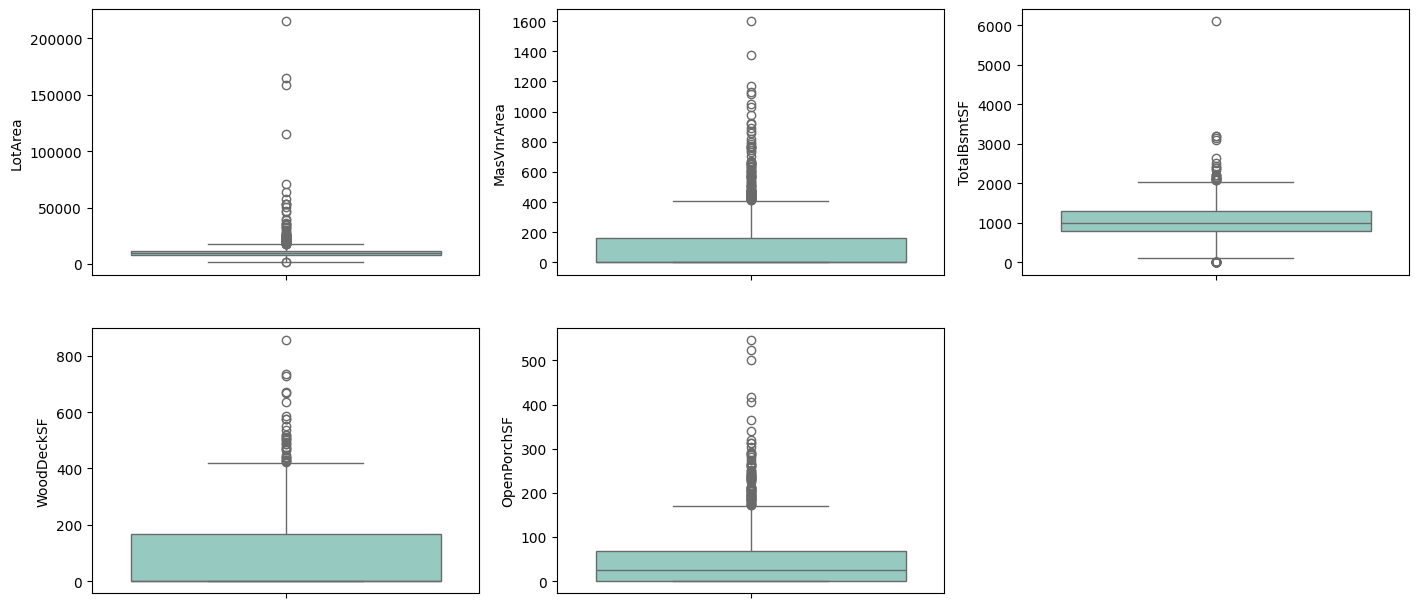

In [51]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = houseinfo_df)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = houseinfo_df)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = houseinfo_df)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = houseinfo_df)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = houseinfo_df)
plt.show()

In [52]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = houseinfo_df['LotArea'].quantile(0.98)
houseinfo_df = houseinfo_df[houseinfo_df["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = houseinfo_df['MasVnrArea'].quantile(0.98)
houseinfo_df = houseinfo_df[houseinfo_df["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = houseinfo_df['TotalBsmtSF'].quantile(0.99)
houseinfo_df = houseinfo_df[houseinfo_df["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = houseinfo_df['WoodDeckSF'].quantile(0.99)
houseinfo_df = houseinfo_df[houseinfo_df["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = houseinfo_df['OpenPorchSF'].quantile(0.99)
houseinfo_df = houseinfo_df[houseinfo_df["OpenPorchSF"] < nn_quartile_OpenPorchSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_LotFrontage = houseinfo_df['LotFrontage'].quantile(0.99)
houseinfo_df = houseinfo_df[houseinfo_df["LotFrontage"] < nn_quartile_LotFrontage]

In [53]:
# Data Visualization

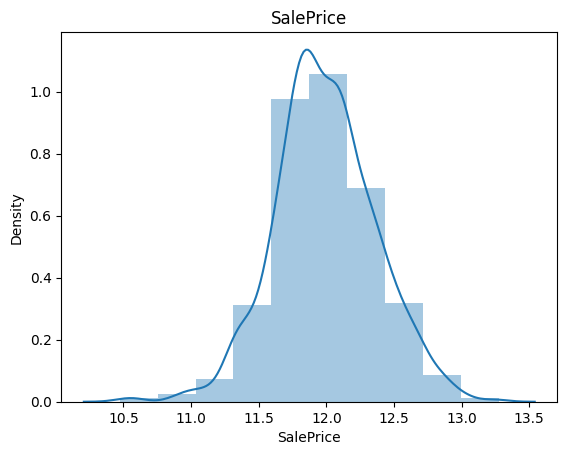

In [54]:
# Visualise the target variable -> SalePrice after transforming the sales price

houseinfo_df['SalePrice'] = np.log1p(houseinfo_df['SalePrice'])

plt.title('SalePrice')
sns.distplot(houseinfo_df['SalePrice'], bins=10)
plt.show()

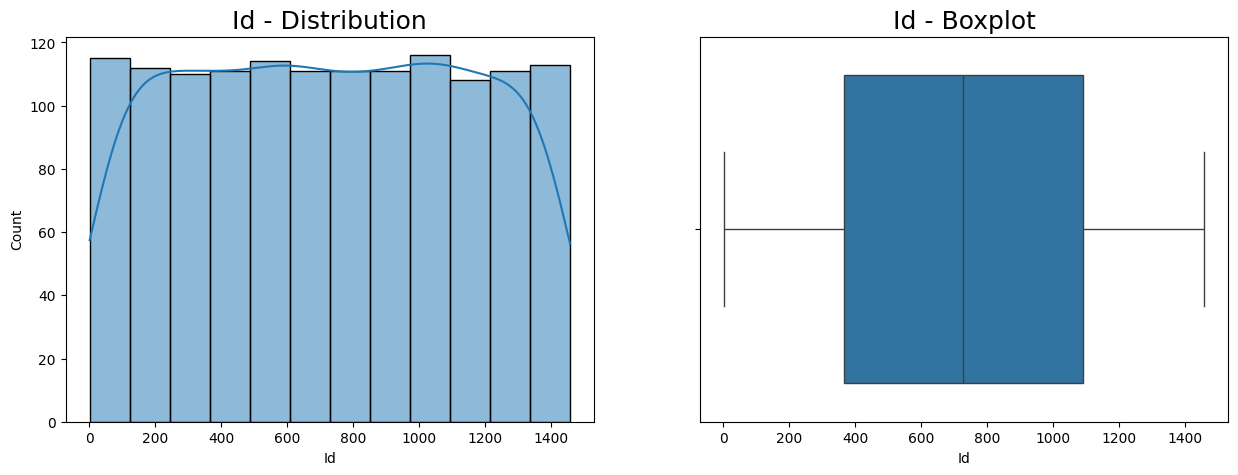

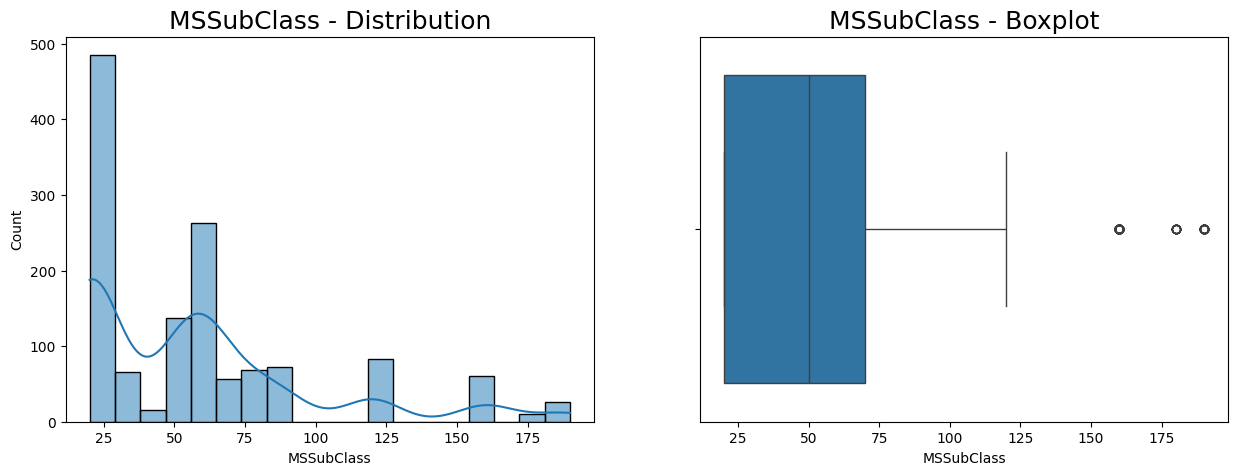

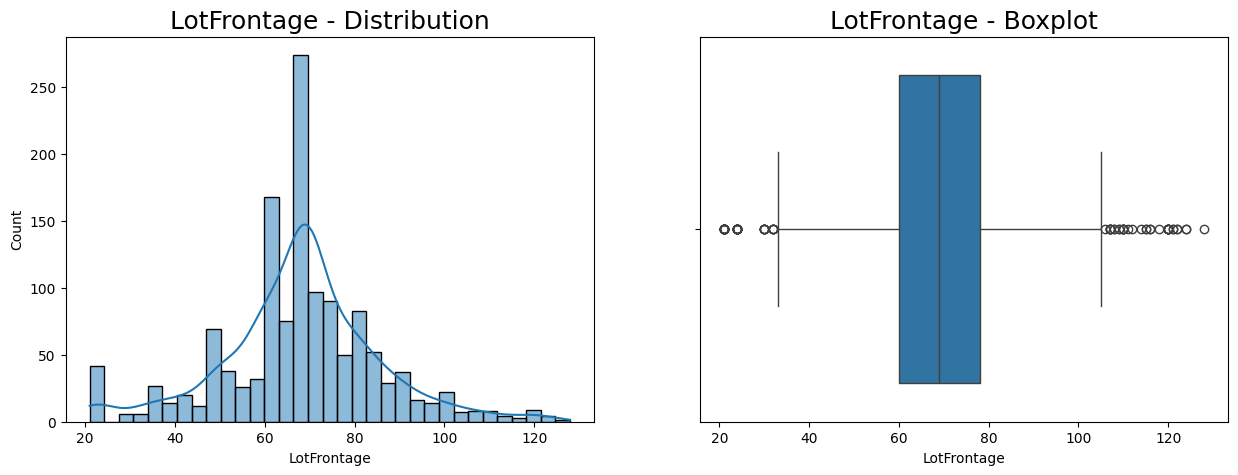

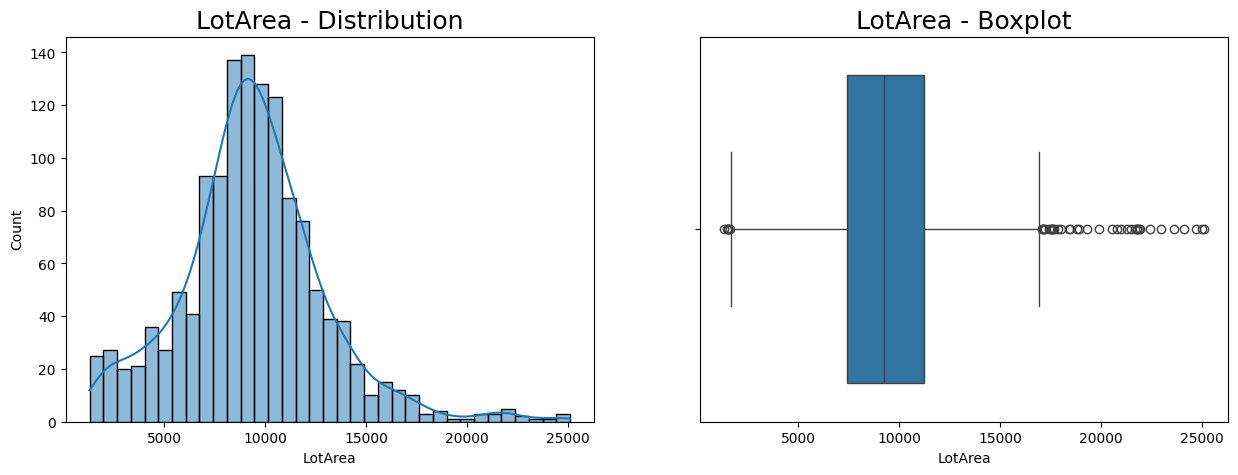

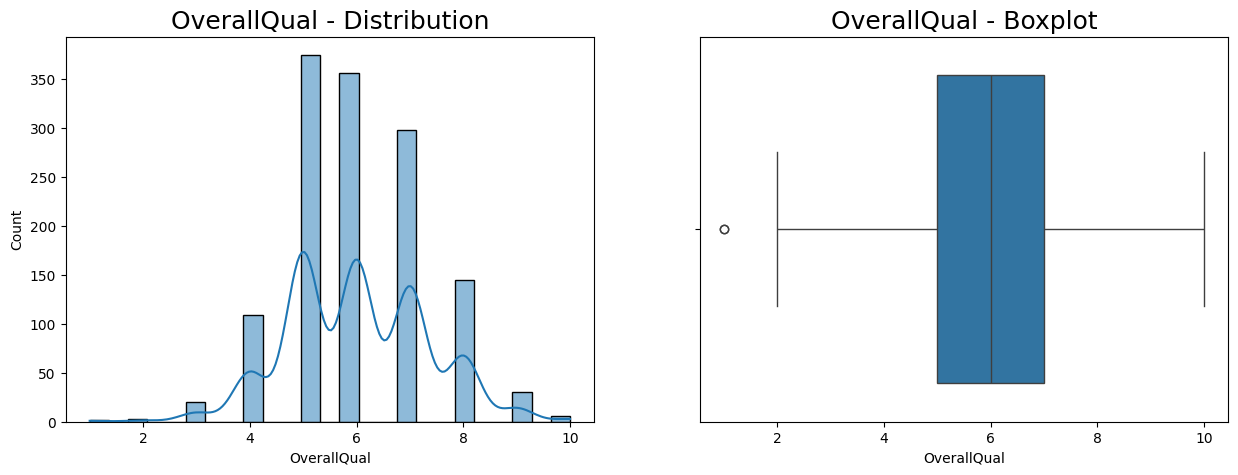

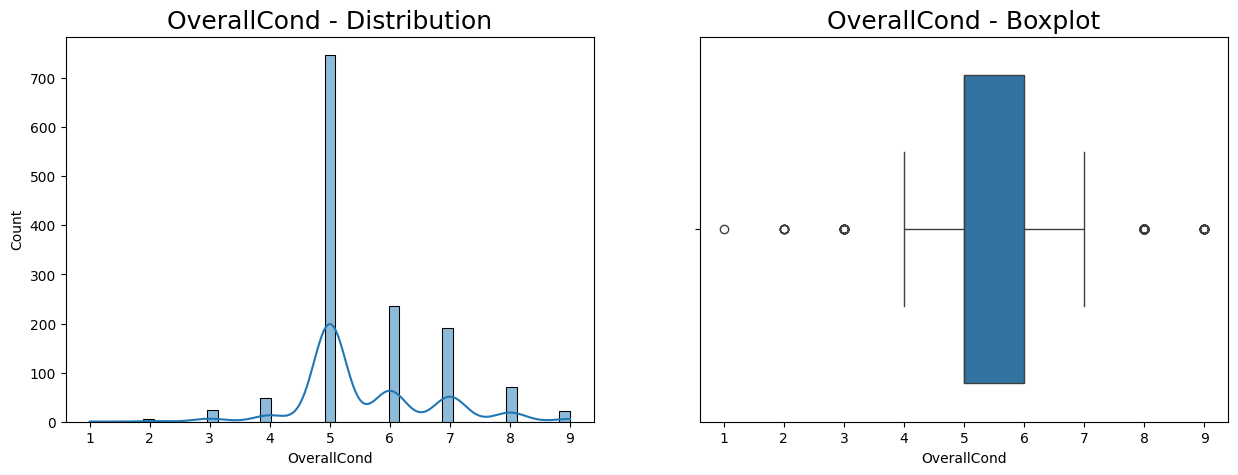

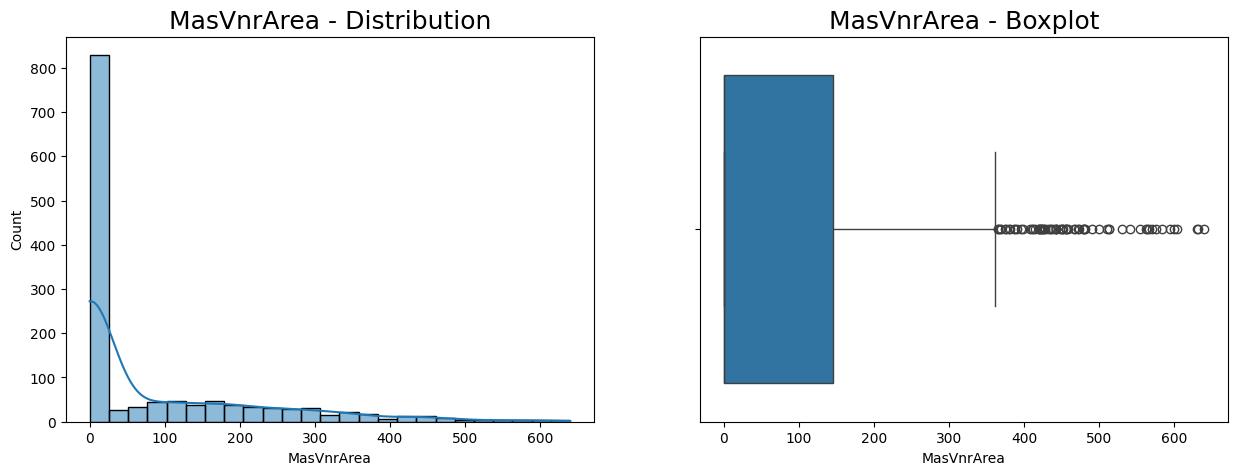

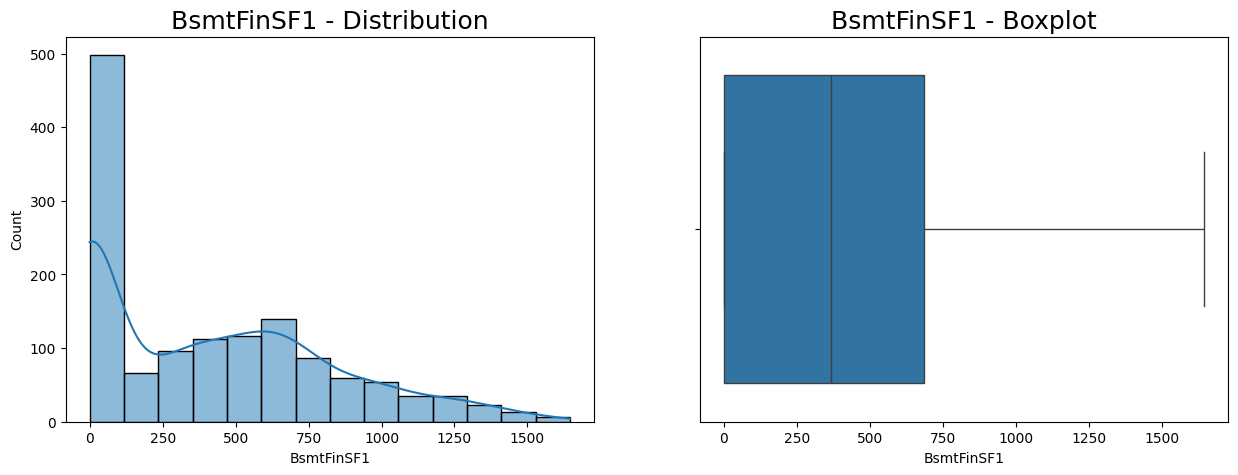

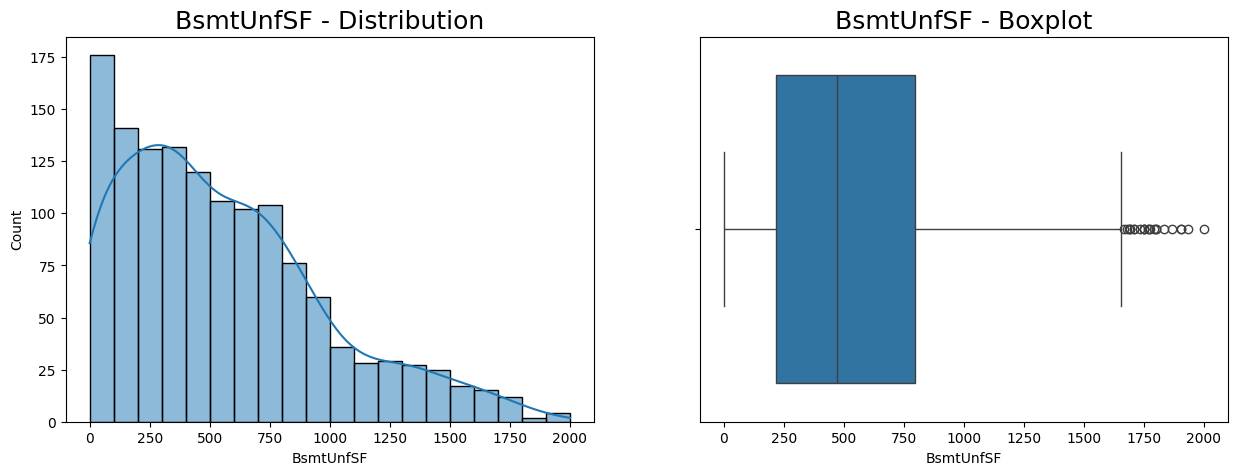

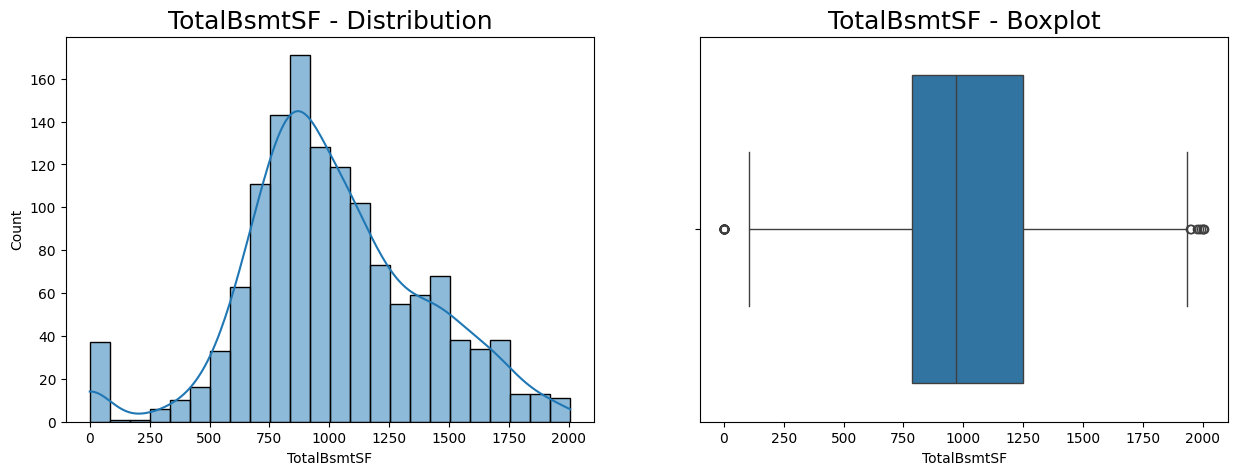

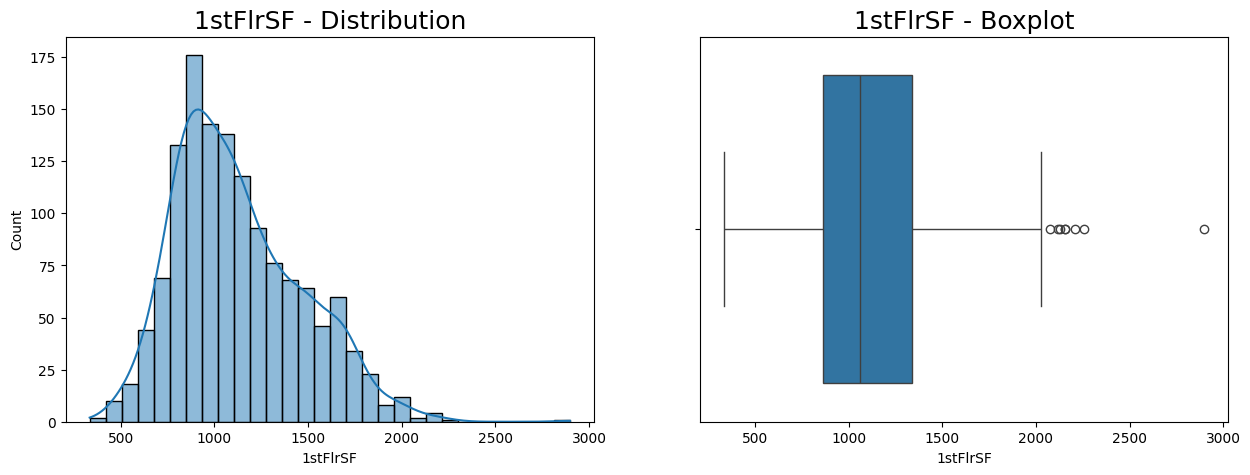

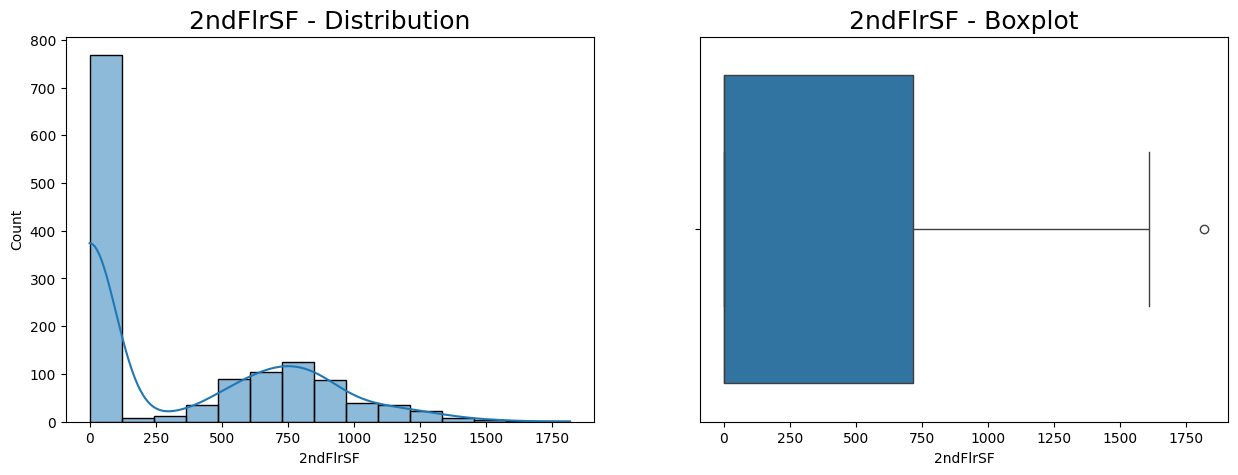

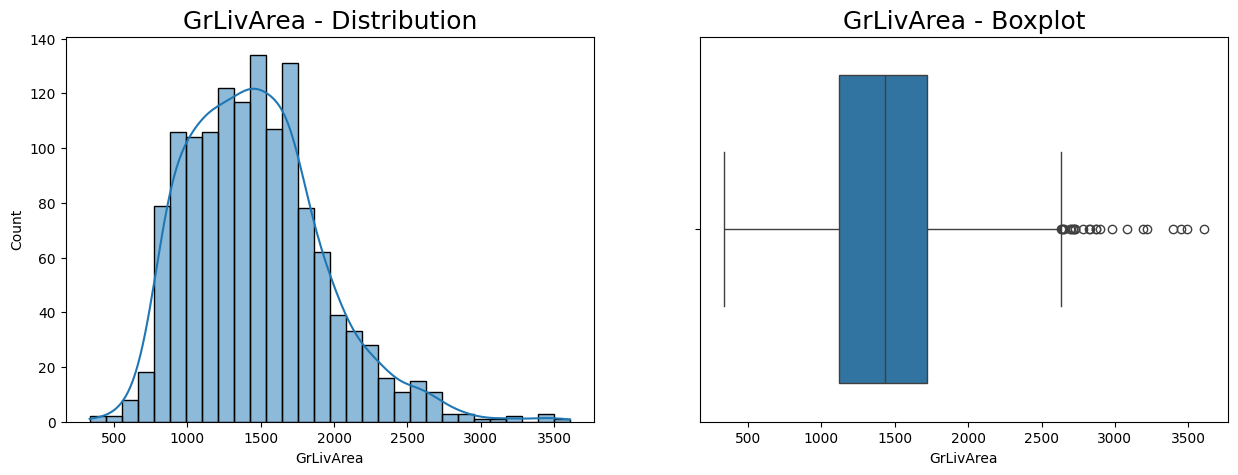

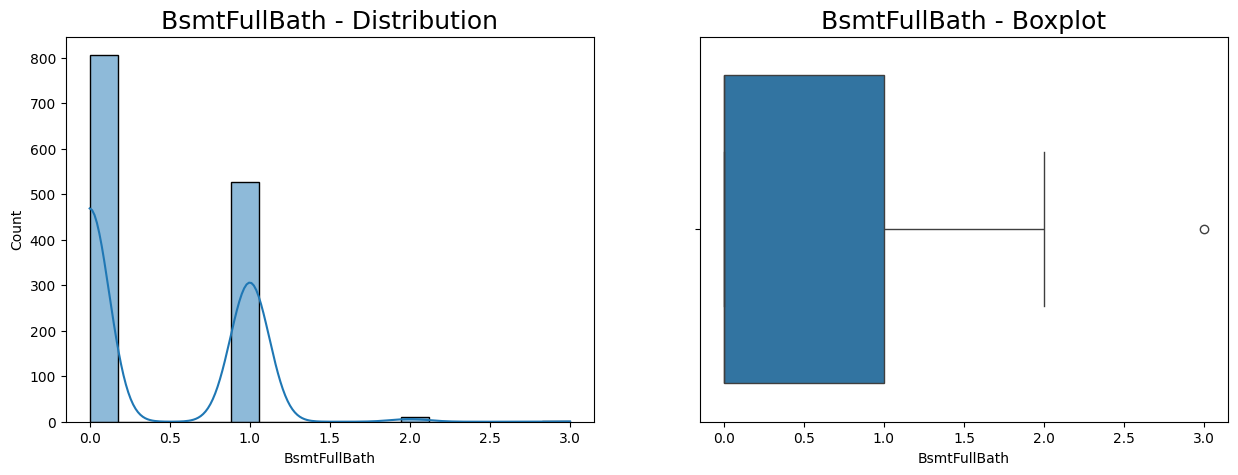

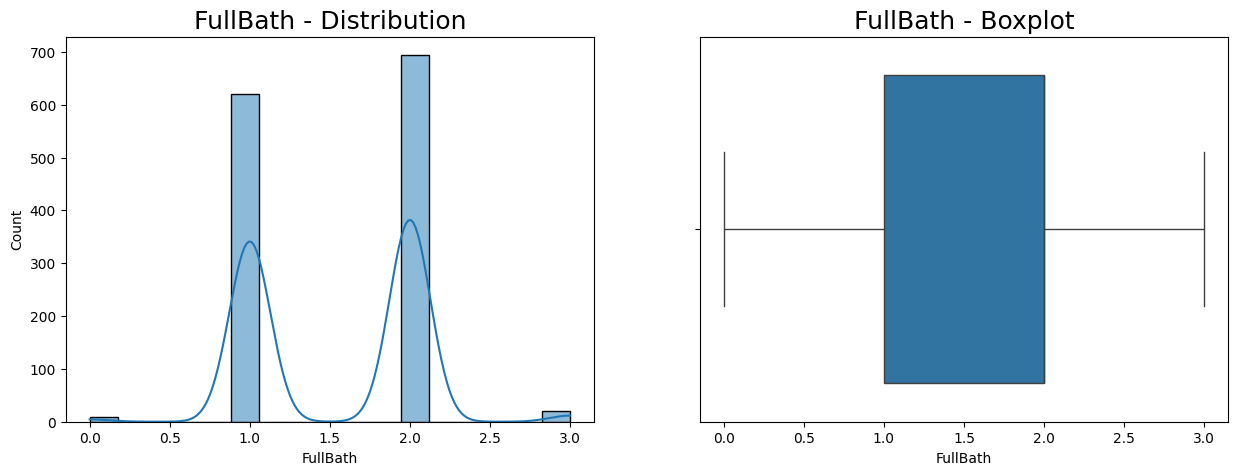

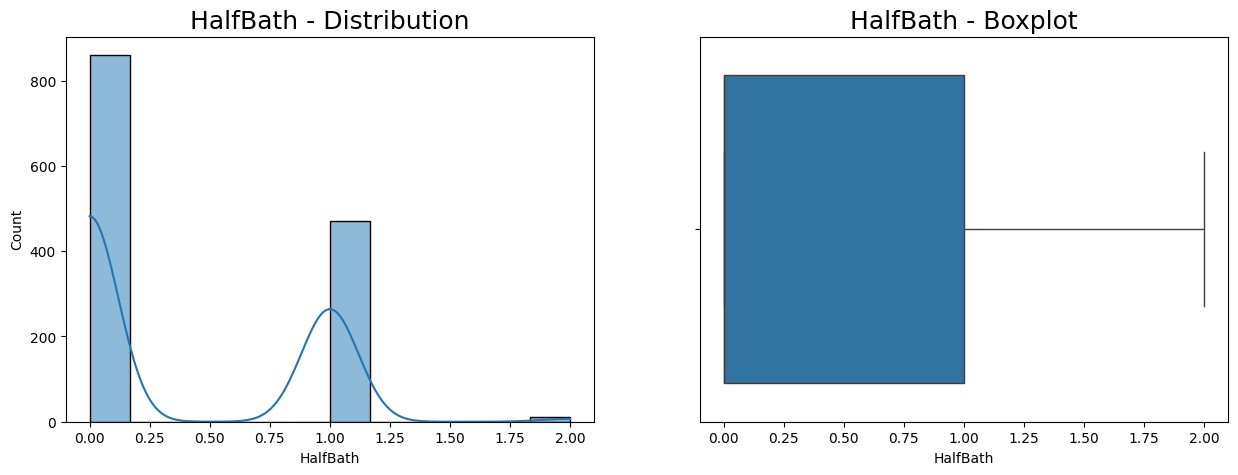

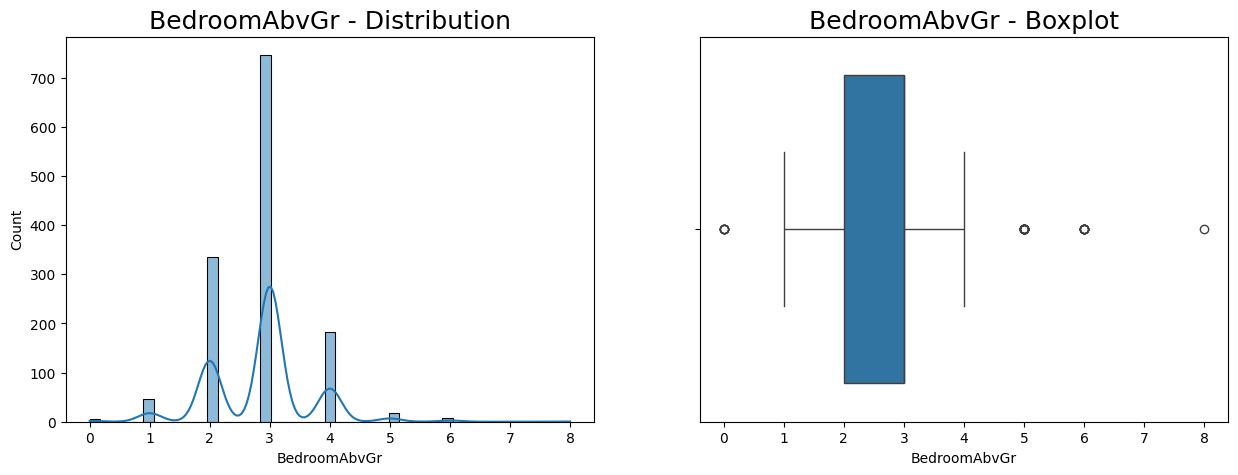

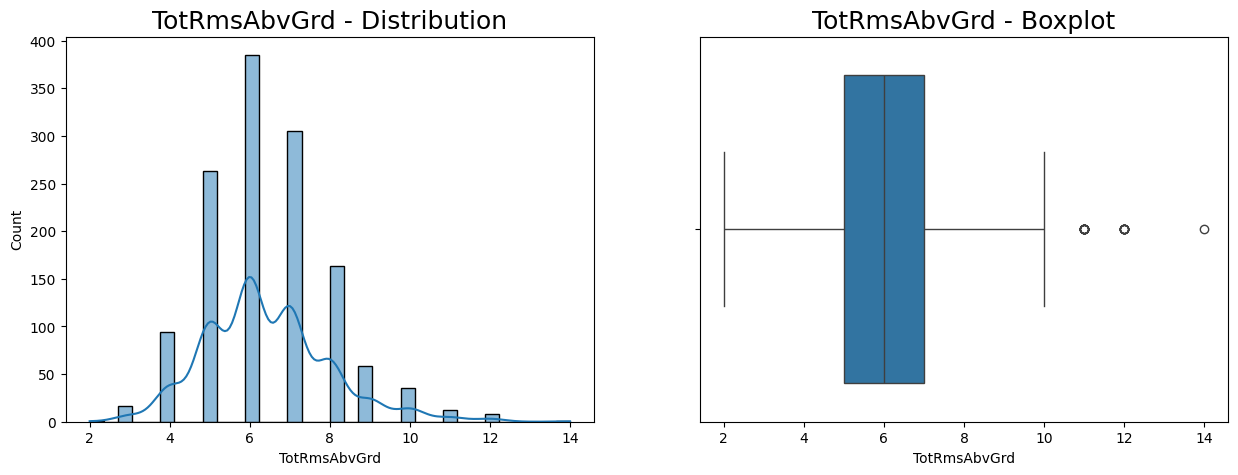

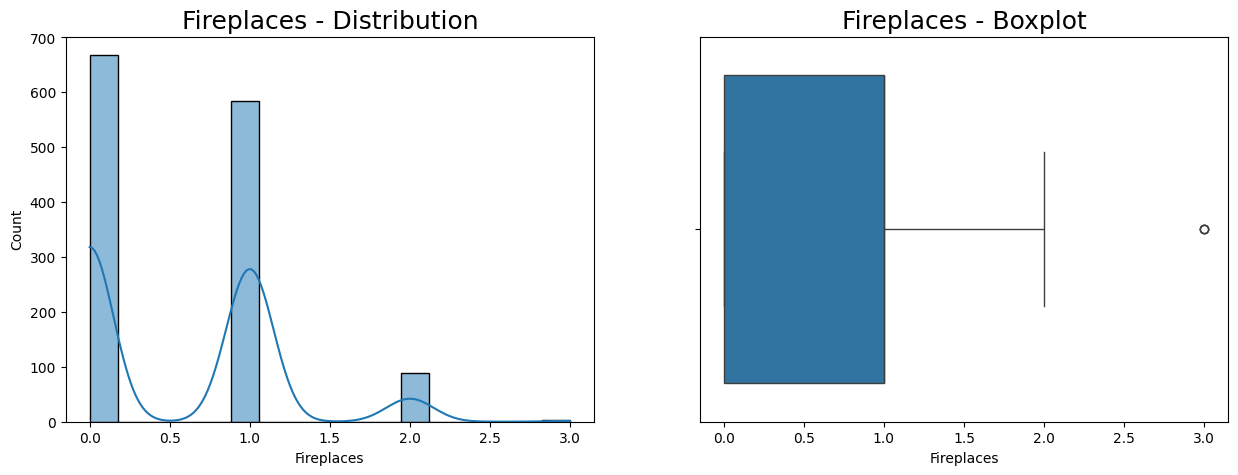

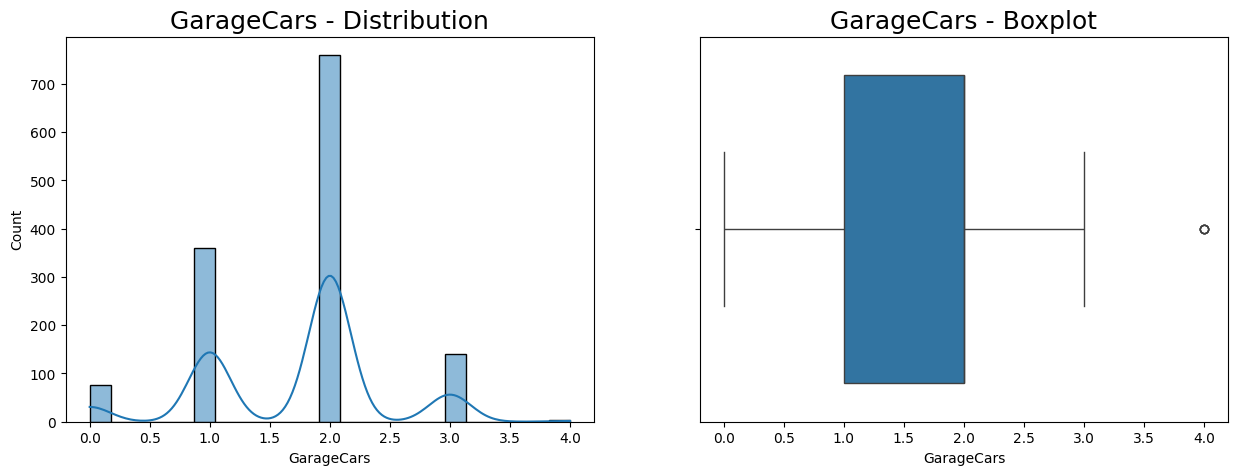

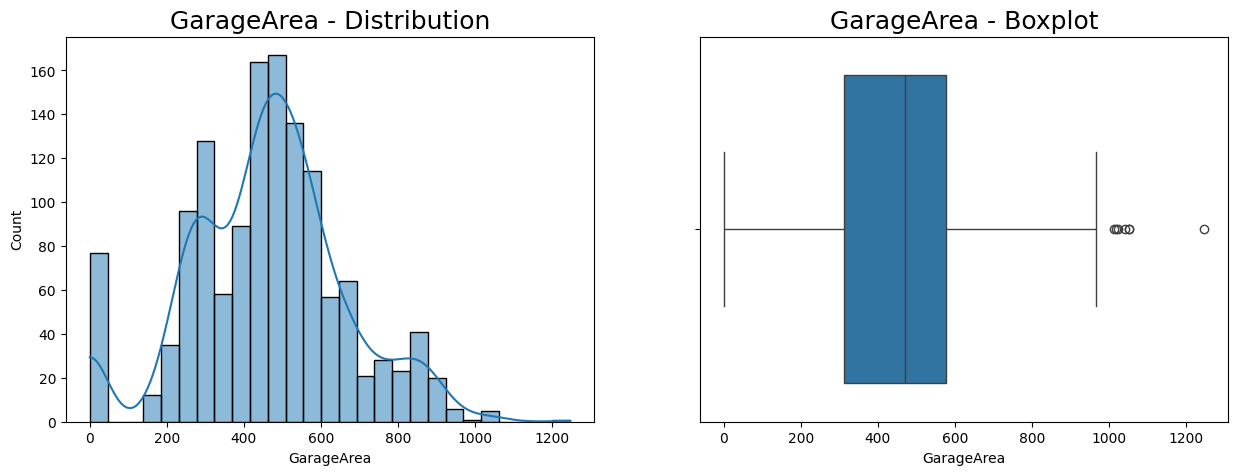

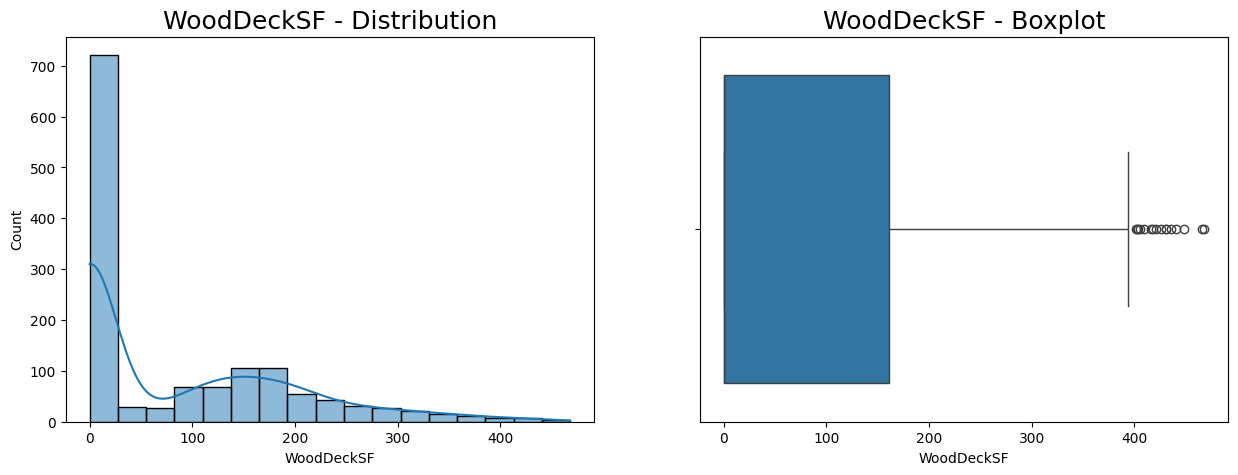

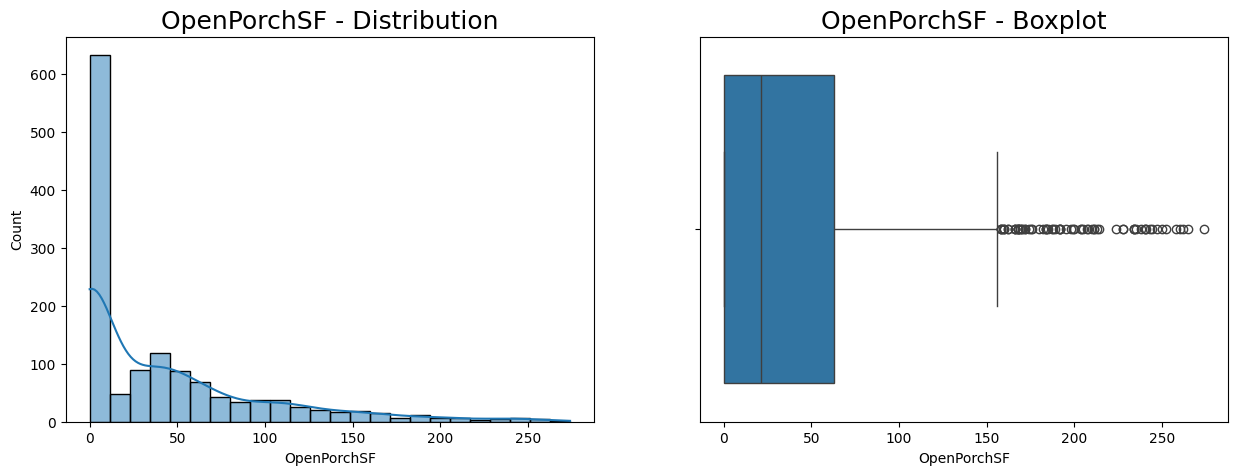

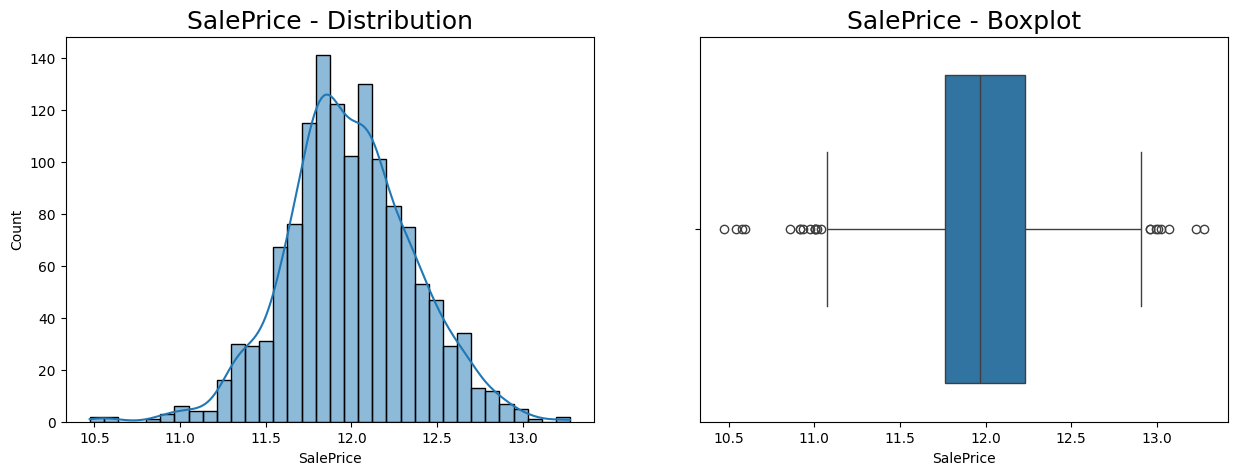

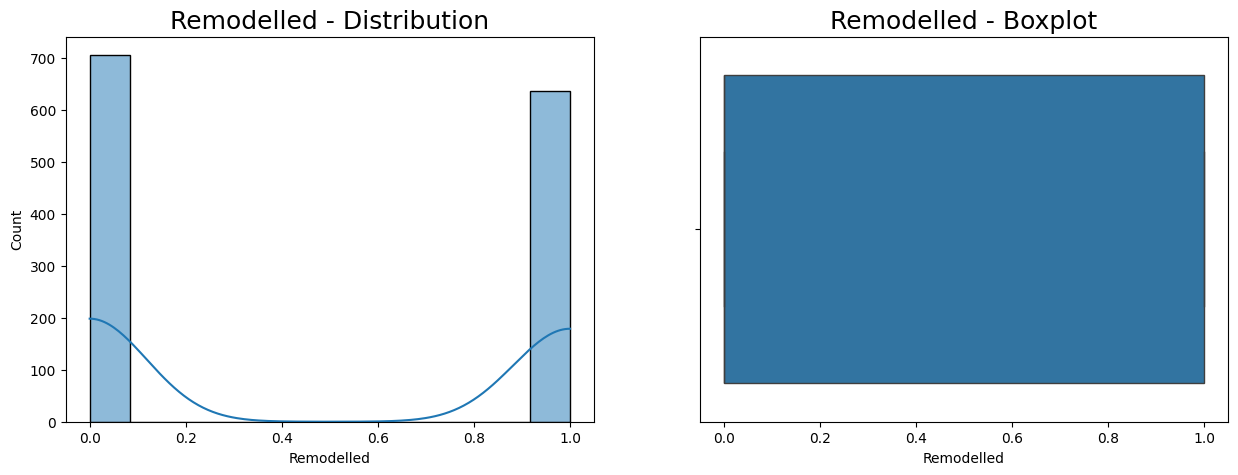

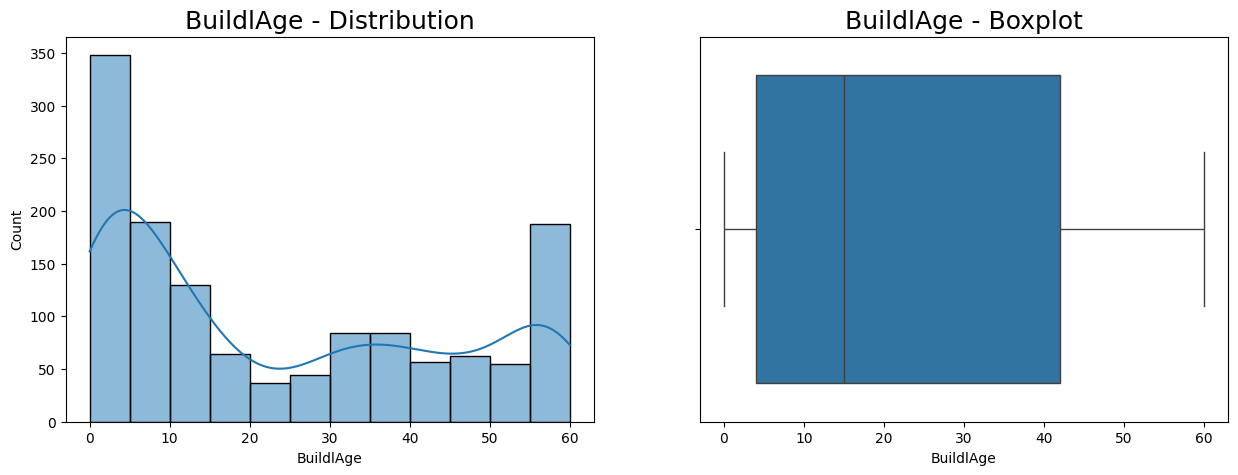

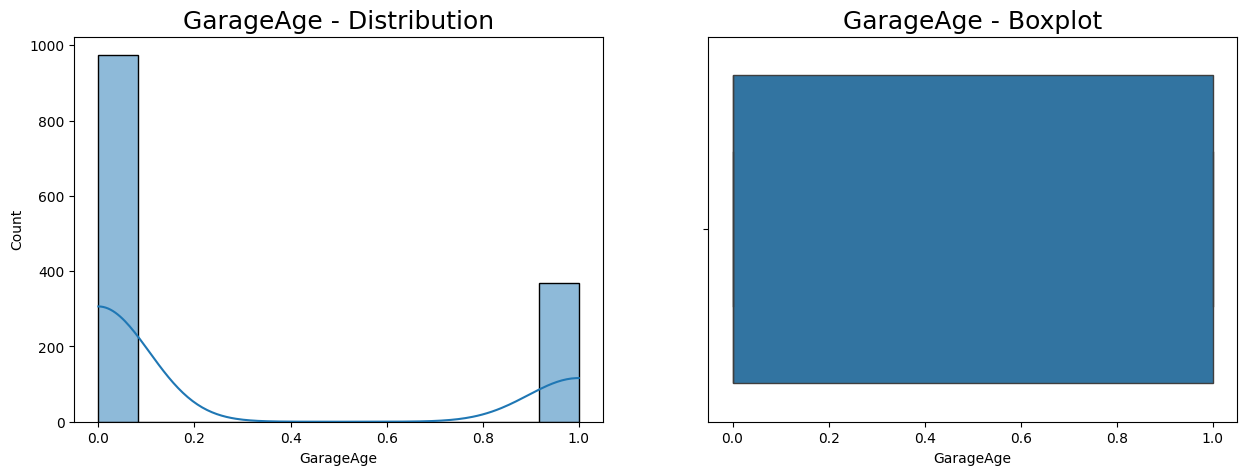

In [55]:
## View the distribution of all numeric variables using histograms and boxplots

numeric_columns = houseinfo_df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_columns:
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.title(f"{col} - Distribution", fontdict={'fontsize': 18})
    sns.histplot(houseinfo_df[col], kde=True)

    plt.subplot(1, 2, 2)
    plt.title(f"{col} - Boxplot", fontdict={'fontsize': 18})
    sns.boxplot(x=houseinfo_df[col])

    plt.show()

In [56]:
# The target value needs to be normalized with some noise.

<Figure size 1000x500 with 0 Axes>

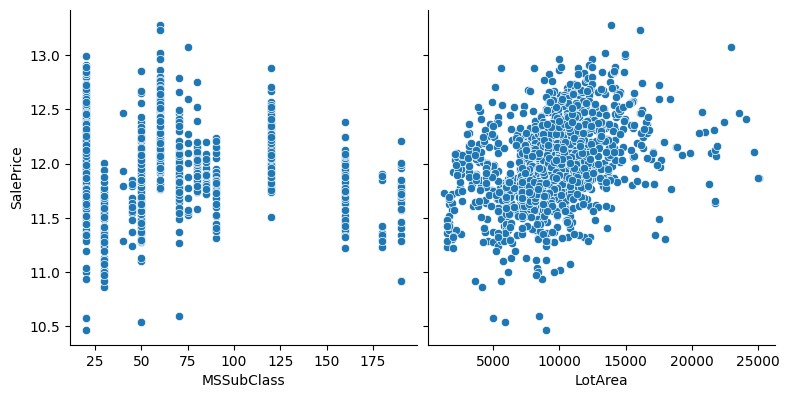

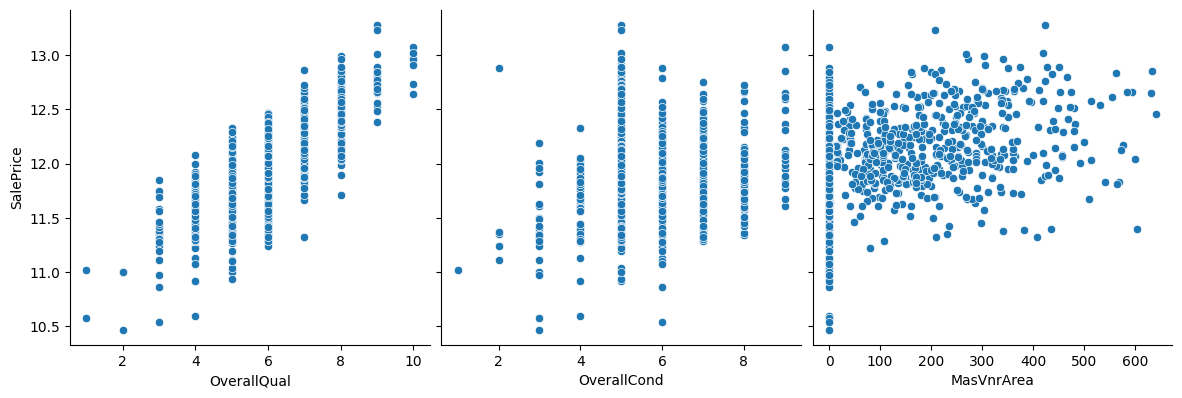

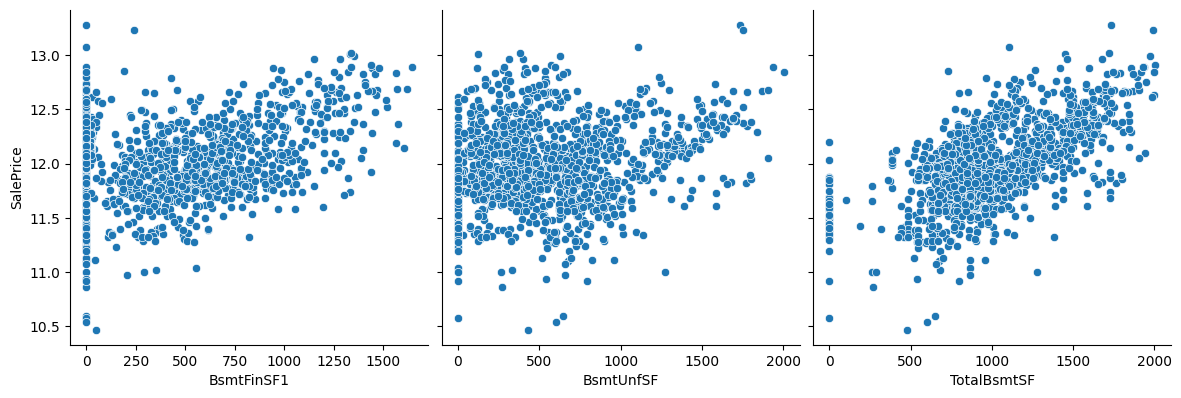

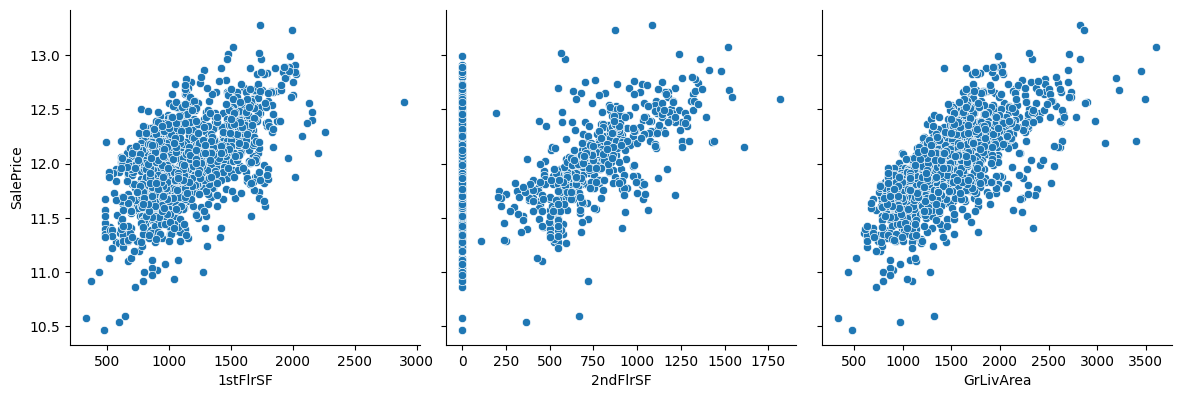

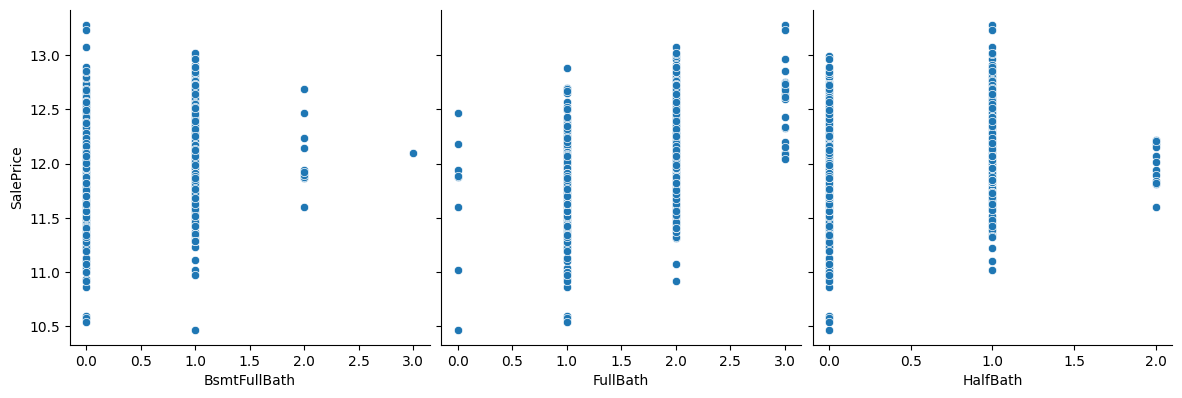

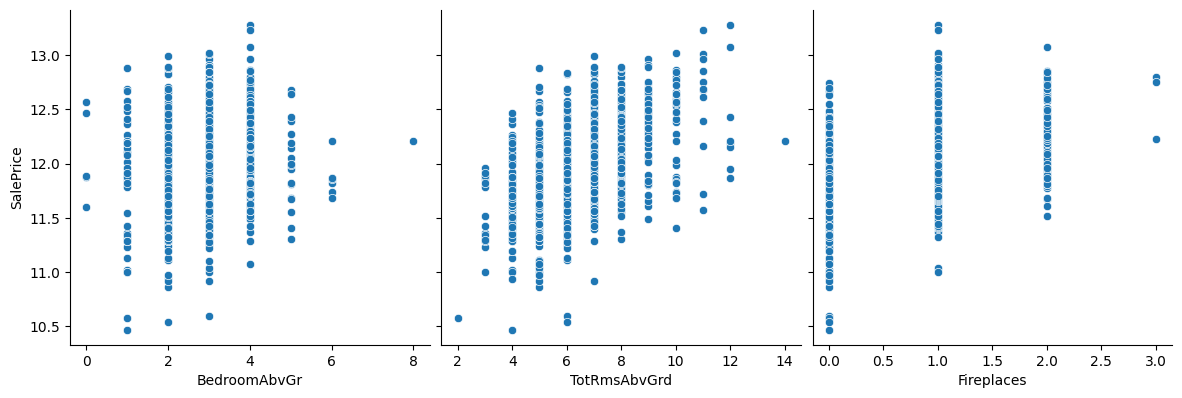

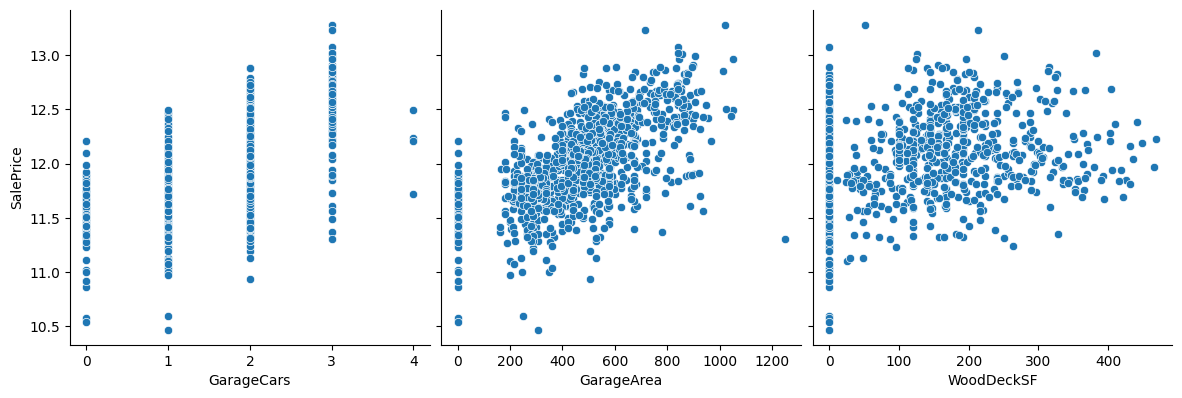

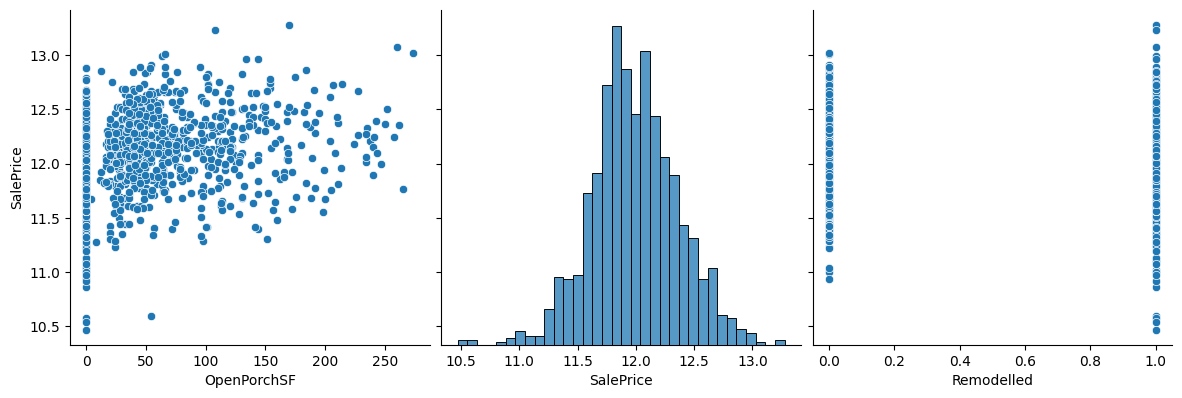

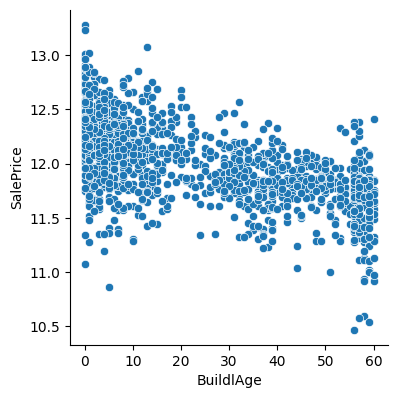

In [57]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(houseinfo_df, x_vars=['MSSubClass','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(houseinfo_df, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(houseinfo_df, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(houseinfo_df, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(houseinfo_df, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(houseinfo_df, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(houseinfo_df, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(houseinfo_df, x_vars=['OpenPorchSF','SalePrice', 'Remodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(houseinfo_df, x_vars=['BuildlAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

In [58]:
# Observations :
# 1stFlrSF, GrLivArea seems to be showing correlation towards right
# Rest of the variables are too scattered and hence can be understood during further analysis

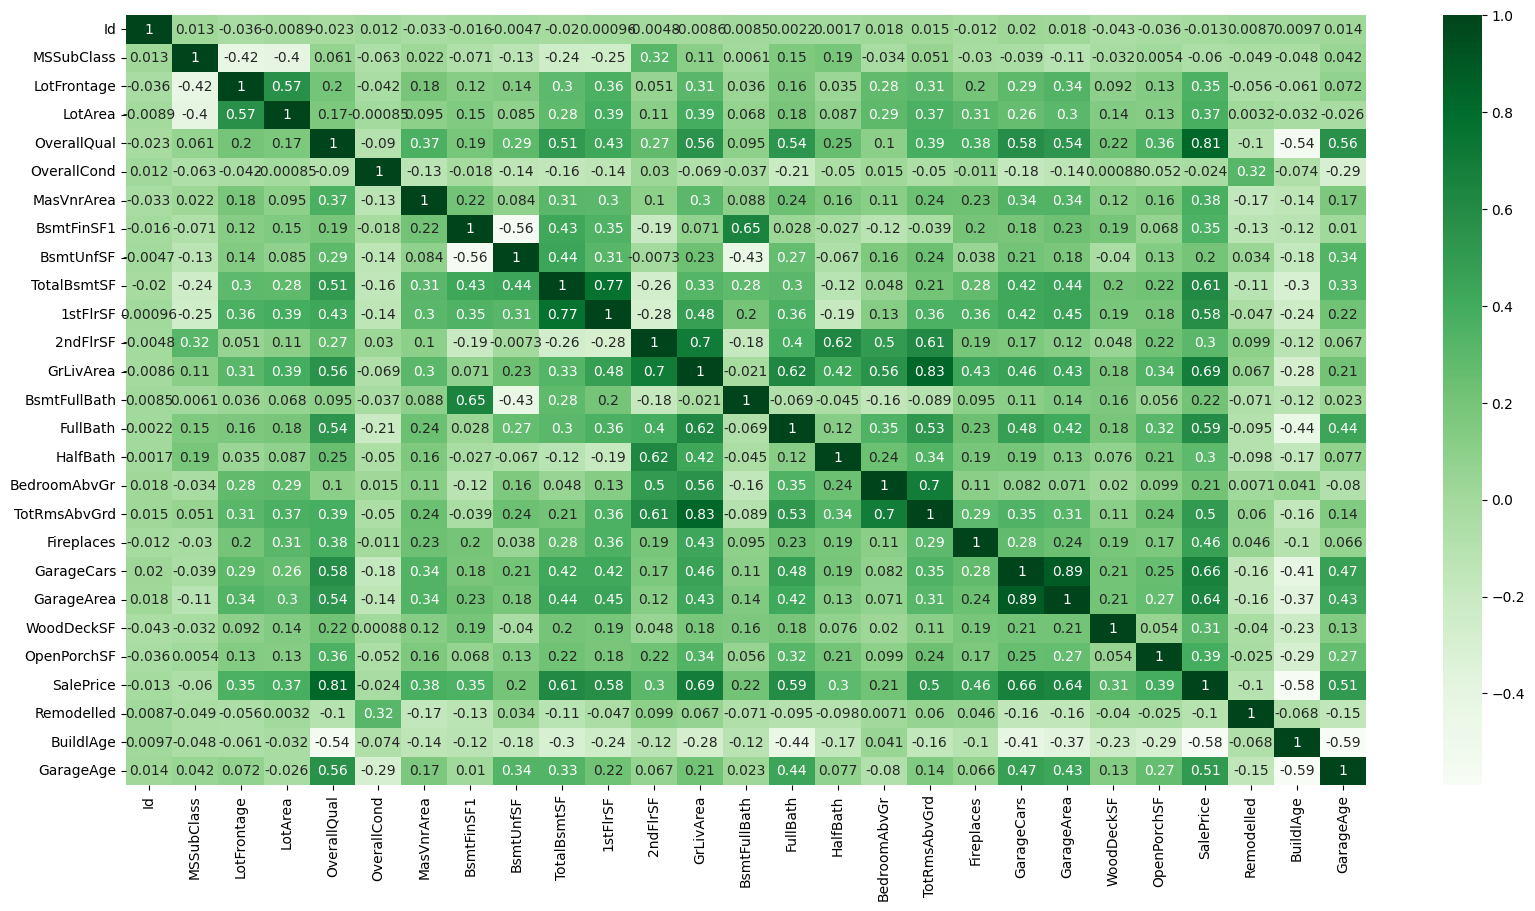

In [59]:
# Check the correlation of numerical columns

numeric_columns = houseinfo_df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 10))
sns.heatmap(houseinfo_df[numeric_columns].corr(), annot=True, cmap="Greens")
plt.show()

In [60]:
# Removing following columns which shows high correlation

In [61]:
# TotRmsAbvGrd and GrLivArea show 82%
# Garage Area and Garage Cars show 88%

# Hence dropping TotRmsAbvGrd and Garage Cars

In [62]:
# Removing the highly correlated variables

houseinfo_df.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [63]:
# Check the shape of the dataframe

houseinfo_df.shape

(1343, 47)

In [64]:
# DATA PREPARATION

In [65]:
#Converting categorical data into numercal data
#Creating Dummies

In [66]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

houseinfo_df['d_LotShape'] = houseinfo_df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
houseinfo_df['d_ExterQual'] = houseinfo_df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
houseinfo_df['d_BsmtQual'] = houseinfo_df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
houseinfo_df['d_BsmtExposure'] = houseinfo_df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
houseinfo_df['d_BsmtFinType1'] = houseinfo_df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1,
                                                                 'None': 0})
houseinfo_df['d_HeatingQC'] = houseinfo_df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
houseinfo_df['d_KitchenQual'] = houseinfo_df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
houseinfo_df['d_FireplaceQu'] = houseinfo_df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
houseinfo_df['d_GarageFinish'] = houseinfo_df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
houseinfo_df['d_BldgType'] = houseinfo_df['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1,
                                                                 'None': 0 })
houseinfo_df['d_HouseStyle'] = houseinfo_df['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4,
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
houseinfo_df['d_Fence'] = houseinfo_df['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
houseinfo_df['d_LotConfig'] = houseinfo_df['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1,
                                                           'None': 0  })
houseinfo_df['d_MasVnrType'] = houseinfo_df['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
houseinfo_df['d_SaleCondition'] = houseinfo_df['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0,
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
houseinfo_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  OverallQual  OverallCond RoofStyle  \
0      CollgCr     1Fam     2Story            7            5     Gable   
1      Veenker     1Fam     1Story            6            8     Gable   
2      CollgCr     1Fam     2Story            7            5     Gable   
3      Crawfor     1Fam     2Story            7            5     Gable   
4      NoRidge     1Fam     2Story            8            5     Gable   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd      PConc   
1     MetalSd     MetalSd       None         0.0        TA     CBlock   
2     VinylSd     VinylSd    BrkFace       162.0        Gd      PConc   
3     Wd Sdng     Wd Shng       None         0.0        TA     BrkTil   
4     VinylSd     VinylSd    BrkFace       350.0        Gd      PConc   

  BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0       Gd           No          GLQ         706        150          856   
1       Gd           Gd          ALQ         978        284         1262   
2       Gd           Mn          GLQ         486        434          920   
3       TA           No          ALQ         216        540          756   
4       Gd           Av          GLQ         655        490         1145   

  HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0        Ex       856       854       1710             1         2         1   
1        Ex      1262         0       1262             0         2         0   
2        Ex       920       866       1786             1         2         1   
3        Gd       961       756       1717             1         1         0   
4        Ex      1145      1053       2198             1         2         1   

   BedroomAbvGr KitchenQual  Fireplaces     FireplaceQu GarageType  \
0             3          Gd           0  Not Applicable     Attchd   
1             3          TA           1              TA     Attchd   
2             3          Gd           1              TA     Attchd   
3             3          Gd           1              Gd     Detchd   
4             4          Gd           1              TA     Attchd   

  GarageFinish  GarageCars  WoodDeckSF  OpenPorchSF           Fence  \
0          RFn           2           0           61  Not Applicable   
1          RFn           2         298            0  Not Applicable   
2          RFn           2           0           42  Not Applicable   
3          Unf           3           0           35  Not Applicable   
4          RFn           3         192           84  Not Applicable   

  SaleCondition  SalePrice  Remodelled  BuildlAge  GarageAge  d_LotShape  \
0        Normal  12.247699           0          5          1           3   
1        Normal  12.109016           0         31          0           3   
2        Normal  12.317171           1          6          1           2   
3       Abnorml  11.849405           1         36          0           2   
4        Normal  12.429220           0          8          1           2   

   d_ExterQual  d_BsmtQual  d_BsmtExposure  d_BsmtFinType1  d_HeatingQC  \
0            4         4.0             1.0             6.0            5   
1            3         4.0             4.0             5.0            5   
2            4         4.0             2.0             6.0            5   
3            3         3.0             1.0             5.0            4   
4            4         4.0             3.0             6.0            5   

In [67]:
# drop the old columns from which the new columns were derived
# We can also drop the id column as it will not be used any more

houseinfo_df = houseinfo_df.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence',
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

houseinfo_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Neighborhood  OverallQual  \
0          60       RL         65.0     8450      CollgCr            7   
1          20       RL         80.0     9600      Veenker            6   
2          60       RL         68.0    11250      CollgCr            7   
3          70       RL         60.0     9550      Crawfor            7   
4          60       RL         84.0    14260      NoRidge            8   

   OverallCond RoofStyle Exterior1st Exterior2nd  MasVnrArea Foundation  \
0            5     Gable     VinylSd     VinylSd       196.0      PConc   
1            8     Gable     MetalSd     MetalSd         0.0     CBlock   
2            5     Gable     VinylSd     VinylSd       162.0      PConc   
3            5     Gable     Wd Sdng     Wd Shng         0.0     BrkTil   
4            5     Gable     VinylSd     VinylSd       350.0      PConc   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0         706        150          856       856       854       1710   
1         978        284         1262      1262         0       1262   
2         486        434          920       920       866       1786   
3         216        540          756       961       756       1717   
4         655        490         1145      1145      1053       2198   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  Fireplaces GarageType  \
0             1         2         1             3           0     Attchd   
1             0         2         0             3           1     Attchd   
2             1         2         1             3           1     Attchd   
3             1         1         0             3           1     Detchd   
4             1         2         1             4           1     Attchd   

   GarageCars  WoodDeckSF  OpenPorchSF  SalePrice  Remodelled  BuildlAge  \
0           2           0           61  12.247699           0          5   
1           2         298            0  12.109016           0         31   
2           2           0           42  12.317171           1          6   
3           3           0           35  11.849405           1         36   
4           3         192           84  12.429220           0          8   

   GarageAge  d_LotShape  d_ExterQual  d_BsmtQual  d_BsmtExposure  \
0          1           3            4         4.0             1.0   
1          0           3            3         4.0             4.0   
2          1           2            4         4.0             2.0   
3          0           2            3         3.0             1.0   
4          1           2            4         4.0             3.0   

   d_BsmtFinType1  d_HeatingQC  d_KitchenQual  d_FireplaceQu  d_GarageFinish  \
0             6.0            5              4            NaN             2.0   
1             5.0            5              3            3.0             2.0   
2             6.0            5              4            3.0             2.0   
3             5.0            4              4            4.0             1.0   
4             6.0            5              4            3.0             2.0   

   d_BldgType  d_HouseStyle  d_Fence  d_LotConfig  d_MasVnrType  \
0           1             4      NaN            5           1.0   
1           1             1      NaN            2           0.0   
2           1             4      NaN            5           1.0   
3           1             4      NaN            4           0.0   
4           1             4      NaN            2           1.0   

   d_SaleCondition  
0                1  
1                1  
2                1  
3                0  
4                1

In [68]:
# For the following columns create dummies

# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(houseinfo_df['MSZoning'], prefix='MSZoning', drop_first = True)
houseinfo_df = pd.concat([houseinfo_df, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(houseinfo_df['Neighborhood'], prefix='Neighborhood', drop_first = True)
houseinfo_df = pd.concat([houseinfo_df, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(houseinfo_df['RoofStyle'], prefix='RoofStyle', drop_first = True)
houseinfo_df = pd.concat([houseinfo_df, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(houseinfo_df['Exterior1st'], prefix='Exterior1st', drop_first = True)
houseinfo_df = pd.concat([houseinfo_df, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(houseinfo_df['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
houseinfo_df = pd.concat([houseinfo_df, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(houseinfo_df['Foundation'], prefix='Foundation', drop_first = True)
houseinfo_df = pd.concat([houseinfo_df, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(houseinfo_df['GarageType'], prefix='GarageType', drop_first = True)
houseinfo_df = pd.concat([houseinfo_df, d_GarageType], axis = 1)

houseinfo_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Neighborhood  OverallQual  \
0          60       RL         65.0     8450      CollgCr            7   
1          20       RL         80.0     9600      Veenker            6   
2          60       RL         68.0    11250      CollgCr            7   
3          70       RL         60.0     9550      Crawfor            7   
4          60       RL         84.0    14260      NoRidge            8   

   OverallCond RoofStyle Exterior1st Exterior2nd  MasVnrArea Foundation  \
0            5     Gable     VinylSd     VinylSd       196.0      PConc   
1            8     Gable     MetalSd     MetalSd         0.0     CBlock   
2            5     Gable     VinylSd     VinylSd       162.0      PConc   
3            5     Gable     Wd Sdng     Wd Shng         0.0     BrkTil   
4            5     Gable     VinylSd     VinylSd       350.0      PConc   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0         706        150          856       856       854       1710   
1         978        284         1262      1262         0       1262   
2         486        434          920       920       866       1786   
3         216        540          756       961       756       1717   
4         655        490         1145      1145      1053       2198   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  Fireplaces GarageType  \
0             1         2         1             3           0     Attchd   
1             0         2         0             3           1     Attchd   
2             1         2         1             3           1     Attchd   
3             1         1         0             3           1     Detchd   
4             1         2         1             4           1     Attchd   

   GarageCars  WoodDeckSF  OpenPorchSF  SalePrice  Remodelled  BuildlAge  \
0           2           0           61  12.247699           0          5   
1           2         298            0  12.109016           0         31   
2           2           0           42  12.317171           1          6   
3           3           0           35  11.849405           1         36   
4           3         192           84  12.429220           0          8   

   GarageAge  d_LotShape  d_ExterQual  d_BsmtQual  d_BsmtExposure  \
0          1           3            4         4.0             1.0   
1          0           3            3         4.0             4.0   
2          1           2            4         4.0             2.0   
3          0           2            3         3.0             1.0   
4          1           2            4         4.0             3.0   

   d_BsmtFinType1  d_HeatingQC  d_KitchenQual  d_FireplaceQu  d_GarageFinish  \
0             6.0            5              4            NaN             2.0   
1             5.0            5              3            3.0             2.0   
2             6.0            5              4            3.0             2.0   
3             5.0            4              4            4.0             1.0   
4             6.0            5              4            3.0             2.0   

   d_BldgType  d_HouseStyle  d_Fence  d_LotConfig  d_MasVnrType  \
0           1             4      NaN            5           1.0   
1           1             1      NaN            2           0.0   
2           1             4      NaN            5           1.0   
3           1             4      NaN            4           0.0   
4           1             4      NaN            2           1.0   

   d_SaleCondition  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                1            0            0            1            0   
1                1            0            0            1            0   
2                1            0            0            1            0   
3                0            0            0            1            0   
4                1            0            0            1            0   

   Neighborhood_

In [69]:
# drop the below columns as we now have new columns derived from these columns

houseinfo_df = houseinfo_df.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation',
                                'GarageType'], axis=1)

houseinfo_df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0         706        150          856       856       854       1710   
1         978        284         1262      1262         0       1262   
2         486        434          920       920       866       1786   
3         216        540          756       961       756       1717   
4         655        490         1145      1145      1053       2198   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  Fireplaces  GarageCars  \
0             1         2         1             3           0           2   
1             0         2         0             3           1           2   
2             1         2         1             3           1           2   
3             1         1         0             3           1           3   
4             1         2         1             4           1           3   

   WoodDeckSF  OpenPorchSF  SalePrice  Remodelled  BuildlAge  GarageAge  \
0           0           61  12.247699           0          5          1   
1         298            0  12.109016           0         31          0   
2           0           42  12.317171           1          6          1   
3           0           35  11.849405           1         36          0   
4         192           84  12.429220           0          8          1   

   d_LotShape  d_ExterQual  d_BsmtQual  d_BsmtExposure  d_BsmtFinType1  \
0           3            4         4.0             1.0             6.0   
1           3            3         4.0             4.0             5.0   
2           2            4         4.0             2.0             6.0   
3           2            3         3.0             1.0             5.0   
4           2            4         4.0             3.0             6.0   

   d_HeatingQC  d_KitchenQual  d_FireplaceQu  d_GarageFinish  d_BldgType  \
0            5              4            NaN             2.0           1   
1            5              3            3.0             2.0           1   
2            5              4            3.0             2.0           1   
3            4              4            4.0             1.0           1   
4            5              4            3.0             2.0           1   

   d_HouseStyle  d_Fence  d_LotConfig  d_MasVnrType  d_SaleCondition  \
0             4      NaN            5           1.0                1   
1             1      NaN            2           0.0                1   
2             4      NaN            5           1.0                1   
3             4      NaN            4           0.0                0   
4             4      NaN            2           1.0                1   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Neighborhood_Blueste  \
0            0            0            1            0                     0   
1            0            0            1            0                     0   
2            0            0            1            0                     0   
3            0            0            1            0                     0   
4            0            0            1            0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0           

In [70]:
#checking the info for the data
houseinfo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1343 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_Not Applicable
dtypes: float64(10), int64(29), uint8(73)
memory usage: 515.4 KB


In [71]:
#Result - All columns in the data set are now numeric

In [72]:
#checking if there are any nul values
houseinfo_df.isnull().sum().sort_values(ascending = False)

d_Fence                      1079
d_FireplaceQu                 668
d_GarageFinish                 77
d_BsmtExposure                 38
d_BsmtFinType1                 37
d_BsmtQual                     37
d_MasVnrType                    6
Exterior1st_CemntBd             0
Exterior1st_Wd Sdng             0
Exterior1st_VinylSd             0
Exterior1st_Stucco              0
Exterior1st_Stone               0
Exterior1st_Plywood             0
Exterior1st_MetalSd             0
Exterior1st_ImStucc             0
Exterior1st_HdBoard             0
MSSubClass                      0
Exterior1st_BrkFace             0
Exterior1st_BrkComm             0
Exterior1st_AsphShn             0
RoofStyle_Shed                  0
RoofStyle_Mansard               0
RoofStyle_Hip                   0
RoofStyle_Gambrel               0
RoofStyle_Gable                 0
Neighborhood_Veenker            0
Neighborhood_Timber             0
Neighborhood_StoneBr            0
Neighborhood_Somerst            0
Neighborhood_S

In [73]:
#treating the columns with missing values
houseinfo_df['d_Fence'].replace({np.nan:'0.0'},inplace=True)
houseinfo_df['d_FireplaceQu'].replace({np.nan:'0.0'},inplace=True)
houseinfo_df['d_GarageFinish'].replace({np.nan:'0.0'},inplace=True)
houseinfo_df['d_BsmtExposure'].replace({np.nan:'0.0'},inplace=True)
houseinfo_df['d_BsmtFinType1'].replace({np.nan:'0.0'},inplace=True)
houseinfo_df['d_BsmtQual'].replace({np.nan:'0.0'},inplace=True)
houseinfo_df['d_MasVnrType'].replace({np.nan:'0.0'},inplace=True)

In [74]:
#checking if there is any null values left
houseinfo_df.isnull().sum().sort_values(ascending = False)

MSSubClass                   0
LotFrontage                  0
Exterior1st_Stucco           0
Exterior1st_Stone            0
Exterior1st_Plywood          0
Exterior1st_MetalSd          0
Exterior1st_ImStucc          0
Exterior1st_HdBoard          0
Exterior1st_CemntBd          0
Exterior1st_CBlock           0
Exterior1st_BrkFace          0
Exterior1st_BrkComm          0
Exterior1st_AsphShn          0
RoofStyle_Shed               0
RoofStyle_Mansard            0
RoofStyle_Hip                0
RoofStyle_Gambrel            0
RoofStyle_Gable              0
Neighborhood_Veenker         0
Neighborhood_Timber          0
Neighborhood_StoneBr         0
Neighborhood_Somerst         0
Neighborhood_SawyerW         0
Neighborhood_Sawyer          0
Neighborhood_SWISU           0
Neighborhood_OldTown         0
Neighborhood_NridgHt         0
Exterior1st_VinylSd          0
Exterior1st_Wd Sdng          0
Exterior1st_WdShing          0
Exterior2nd_Wd Sdng          0
GarageType_Detchd            0
GarageTy

In [75]:
#checking the no of rows and columns in the data post all the data cleaning and treatment
houseinfo_df.shape

(1343, 112)

In [76]:
# TRAIN AND SPLIT

In [77]:
## splitting the data into train and test
df_train, df_test = train_test_split(houseinfo_df, train_size=0.7,test_size=0.3, random_state=100)
print(df_train.shape)
print(df_test.shape)

(940, 112)
(403, 112)


In [78]:
#checking the desctribe function forn the training data
df_train.describe()

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  940.000000   940.000000    940.000000   940.000000   940.000000   
mean    56.409574    68.628723   9540.531915     6.057447     5.592553   
std     41.715188    17.298464   3522.034946     1.321929     1.089669   
min     20.000000    21.000000   1300.000000     1.000000     2.000000   
25%     20.000000    60.000000   7594.500000     5.000000     5.000000   
50%     50.000000    69.000000   9391.000000     6.000000     5.000000   
75%     70.000000    78.000000  11256.250000     7.000000     6.000000   
max    190.000000   128.000000  25000.000000    10.000000     9.000000   

       MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  940.000000   940.000000   940.000000   940.000000   940.000000   
mean    88.571277   412.617021   574.997872  1026.547872  1134.052128   
std    136.457338   413.138104   431.788072   379.220998   340.191972   
min      0.000000     0.000000     0.000000     0.000000   334.000000   
25%      0.000000     0.000000   234.750000   792.750000   873.500000   
50%      0.000000   362.500000   510.000000   981.000000  1072.500000   
75%    160.500000   686.000000   811.000000  1262.000000  1360.000000   
max    632.000000  1646.000000  1935.000000  2000.000000  2898.000000   

          2ndFlrSF    GrLivArea  BsmtFullBath    FullBath    HalfBath  \
count   940.000000   940.000000    940.000000  940.000000  940.000000   
mean    334.965957  1475.485106      0.403191    1.552128    0.374468   
std     422.067091   463.647732      0.512039    0.542590    0.505757   
min       0.000000   334.000000      0.000000    0.000000    0.000000   
25%       0.000000  1120.750000      0.000000    1.000000    0.000000   
50%       0.000000  1441.500000      0.000000    2.000000    0.000000   
75%     716.250000  1726.500000      1.000000    2.000000    1.000000   
max    1818.000000  3608.000000      3.000000    3.000000    2.000000   

       BedroomAbvGr  Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  \
count    940.000000  940.000000  940.000000  940.000000   940.000000   
mean       2.874468    0.582979    1.750000   82.711702    42.384043   
std        0.800151    0.629864    0.737155  107.216555    55.482820   
min        0.000000    0.000000    0.000000    0.000000     0.000000   
25%        2.000000    0.000000    1.000000    0.000000     0.000000   
50%        3.000000    1.000000    2.000000    0.000000    24.000000   
75%        3.000000    1.000000    2.000000  154.000000    64.250000   
max        8.000000    3.000000    4.000000  468.000000   265.000000   

        SalePrice  Remodelled   BuildlAge   GarageAge  d_LotShape  \
count  940.000000  940.000000  940.000000  940.000000  940.000000   
mean    12.001003    0.480851   23.272340    0.273404    2.630851   
std      0.367241    0.499899   20.649163    0.445944    0.552760   
min     10.471978    0.000000    0.000000    0.000000    0.000000   
25%     11.771444    0.000000    4.000000    0.000000    2.000000   
50%     11.978029    0.000000   15.000000    0.000000    3.000000   
75%     12.235454    1.000000   42.000000    1.000000    3.000000   
max     13.229570    1.000000   60.000000    1.000000    3.000000   

       d_ExterQual  d_HeatingQC  d_KitchenQual  d_BldgType  d_HouseStyle  \
count   940.000000   940.000000     940.000000  940.000000    940.000000   
mean      3.362766     4.122340       3.479787    1.421277      2.690426   
std       0.545381     0.964178       0.640001    1.036693      1.996513   
min       2.000000     1.000000       2.000000    1.000000      1.000000   
25%       3.000000     3.000000       3.000000    1.000000      1.000000   
50%       3.000000     4.000000       3.000000    1.000000      2.000000   
75%       4.000000     5.000000       4.000000    1.000000      4.000000   
max       5.000000     5.000000       5.000000    5.000000      8.000000   

       d_LotConfig  d_SaleCondition  MSZoning_FV  MSZoning_RH  MSZon

In [79]:
# defining x_train and y_train
y_train = df_train.pop('SalePrice')
x_train = df_train

In [80]:
#displaying the values for y
y_train.head()

1143    11.289794
1053    11.881042
742     12.095147
164     11.931642
1258    12.154785
Name: SalePrice, dtype: float64

In [81]:
# displaying the values for x
x_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
1143          20         69.0     9000            5            3         0.0   
1053          20         68.0     8562            5            6       145.0   
742           20         65.0     8450            7            5       108.0   
164           40         40.0     5400            6            7         0.0   
1258          80         59.0     9587            7            5       182.0   

      BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
1143         288        718         1006      1006         0       1006   
1053         383        833         1216      1526         0       1526   
742            0       1349         1349      1349         0       1349   
164          370        779         1149      1149       467       1616   
1258         655        201          856      1166         0       1166   

      BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  Fireplaces  GarageCars  \
1143             0         1         0             3           0           0   
1053             0         1         0             4           1           1   
742              0         2         0             3           0           2   
164              0         2         0             3           0           1   
1258             1         2         0             2           0           2   

      WoodDeckSF  OpenPorchSF  Remodelled  BuildlAge  GarageAge  d_LotShape  \
1143           0           24           0         49          0           3   
1053         116           78           1          8          0           3   
742          120           55           1          6          1           3   
164            0            0           1          3          0           3   
1258         212            0           0          3          1           2   

      d_ExterQual d_BsmtQual d_BsmtExposure d_BsmtFinType1  d_HeatingQC  \
1143            3        3.0            1.0            6.0            3   
1053            3        3.0            3.0            3.0            5   
742             3        4.0            1.0            1.0            5   
164             3        3.0            2.0            2.0            4   
1258            4        4.0            4.0            6.0            5   

      d_KitchenQual d_FireplaceQu d_GarageFinish  d_BldgType  d_HouseStyle  \
1143              3           0.0            0.0           1             1   
1053              3           4.0            1.0           1             1   
742               3           0.0            1.0           1             1   
164               4           0.0            1.0           1             1   
1258              4           0.0            3.0           1             8   

     d_Fence  d_LotConfig d_MasVnrType  d_SaleCondition  MSZoning_FV  \
1143     0.0            5          0.0                1            0   
1053     0.0            5          1.0                1            0   
742      4.0            5          1.0                1            0   
164      0.0            4          0.0                1            0   
1258     0.0            5          1.0                1            0   

      MSZoning_RH  MSZoning_RL  MSZoning_RM  Neighborhood_Blueste  \
1143            0            1            0                     0   
1053            0            1            0                     0   
742             0            1            0                     0   
164             0            0            1                     0   
1258            0            1            0                     0   

      Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
1143                    0                     0                     0   
1053                    0                     0                     0   
742                     0                     0                     0   
164                     0                     0           

In [82]:
# RFE Model

In [83]:
## import rfe and linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [84]:
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=35)  # running RFE
rfe.fit(x_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=35)

In [85]:
# listing the ranking by rfe for the selection of the variables
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 63),
 ('LotFrontage', False, 61),
 ('LotArea', False, 74),
 ('OverallQual', True, 1),
 ('OverallCond', False, 13),
 ('MasVnrArea', False, 73),
 ('BsmtFinSF1', False, 68),
 ('BsmtUnfSF', False, 71),
 ('TotalBsmtSF', False, 67),
 ('1stFlrSF', False, 72),
 ('2ndFlrSF', False, 75),
 ('GrLivArea', False, 66),
 ('BsmtFullBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', False, 15),
 ('BedroomAbvGr', True, 1),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('WoodDeckSF', False, 69),
 ('OpenPorchSF', False, 70),
 ('Remodelled', False, 58),
 ('BuildlAge', False, 60),
 ('GarageAge', False, 62),
 ('d_LotShape', False, 20),
 ('d_ExterQual', False, 43),
 ('d_BsmtQual', False, 3),
 ('d_BsmtExposure', False, 34),
 ('d_BsmtFinType1', False, 50),
 ('d_HeatingQC', False, 35),
 ('d_KitchenQual', True, 1),
 ('d_FireplaceQu', False, 41),
 ('d_GarageFinish', False, 37),
 ('d_BldgType', False, 30),
 ('d_HouseStyle', False, 64),
 ('d_Fence', False, 59),
 ('d_LotConfig', False

In [86]:
#displaying the columns selected by rfe
col = x_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'Fireplaces',
       'GarageCars', 'd_KitchenQual', 'd_SaleCondition', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV',
       'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_Stone', 'Exterior2nd_BrkFace',
       'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng',
       'Foundation_Stone', 'Foundation_Wood', 'GarageType_Attchd',
       'GarageType_BuiltIn'],
      dtype='object')

In [87]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train[col]

In [88]:
# Adding a constant variable
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe)

In [89]:
lm = sm.OLS(y_train,x_train_rfe).fit()   # Running the linear model

In [90]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     142.4
Date:                Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:36:30   Log-Likelihood:                 489.17
No. Observations:                 940   AIC:                            -906.3
Df Residuals:                     904   BIC:                            -731.9
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.2629 

In [91]:
# we will calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
#X = x_train_new
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                  const  197.12
11           MSZoning_RL   29.79
12           MSZoning_RM   22.81
9            MSZoning_FV    9.30
1            OverallQual    2.91
10           MSZoning_RH    2.87
24   Exterior1st_BrkFace    2.37
28   Exterior2nd_BrkFace    2.32
7          d_KitchenQual    1.99
3               FullBath    1.87
34     GarageType_Attchd    1.79
6             GarageCars    1.76
35    GarageType_BuiltIn    1.45
16  Neighborhood_MeadowV    1.43
26   Exterior1st_CemntBd    1.42
5             Fireplaces    1.38
4           BedroomAbvGr    1.34
29     Exterior2nd_Stone    1.29
19  Neighborhood_NridgHt    1.23
27     Exterior1st_Stone    1.20
15  Neighborhood_Crawfor    1.17
2           BsmtFullBath    1.13
8        d_SaleCondition    1.11
20  Neighborhood_StoneBr    1.11
21  Neighborhood_Veenker    1.10
32      Foundation_Stone    1.10
30    Exterior2nd_Stucco    1.09
18  Neighborhood_NoRidge    1.08
14   Neighborhood_BrDale    1.08
31   Exterior2nd_Wd Shng    1.06
22     RoofStyle_Mansard    1.06
17  Neighborhood_NPkVill    1.03
23        RoofStyle_Shed    1.02
13  Neighborhood_Blueste    1.02
25    Exterior1st_CBlock    1.01
33       Foundation_Wood    1.01

In [92]:
# dropping the workingday variable as it has high vif value
x_train_new = x_train_rfe.drop(['MSZoning_RL'], axis=1)

In [93]:
# building the model again post dropping a variable
#Adding a constant variable
import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train_new)

In [94]:
lm = sm.OLS(y_train,x_train_lm).fit()   # Running the linear model

In [95]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     144.6
Date:                Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:36:32   Log-Likelihood:                 483.15
No. Observations:                 940   AIC:                            -896.3
Df Residuals:                     905   BIC:                            -726.7
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.4492 

In [96]:
#we will calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
#X = x_train_new
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                  const  66.84
1            OverallQual   2.89
23   Exterior1st_BrkFace   2.37
27   Exterior2nd_BrkFace   2.32
7          d_KitchenQual   1.99
3               FullBath   1.87
33     GarageType_Attchd   1.78
6             GarageCars   1.76
34    GarageType_BuiltIn   1.45
15  Neighborhood_MeadowV   1.43
25   Exterior1st_CemntBd   1.42
5             Fireplaces   1.38
11           MSZoning_RM   1.35
4           BedroomAbvGr   1.33
28     Exterior2nd_Stone   1.29
18  Neighborhood_NridgHt   1.23
9            MSZoning_FV   1.22
26     Exterior1st_Stone   1.20
14  Neighborhood_Crawfor   1.17
2           BsmtFullBath   1.13
19  Neighborhood_StoneBr   1.11
20  Neighborhood_Veenker   1.10
29    Exterior2nd_Stucco   1.09
17  Neighborhood_NoRidge   1.08
13   Neighborhood_BrDale   1.08
10           MSZoning_RH   1.07
8        d_SaleCondition   1.07
31      Foundation_Stone   1.06
21     RoofStyle_Mansard   1.05
30   Exterior2nd_Wd Shng   1.05
16  Neighborhood_NPkVill   1.03
12  Neighborhood_Blueste   1.02
22        RoofStyle_Shed   1.02
24    Exterior1st_CBlock   1.01
32       Foundation_Wood   1.01

In [97]:
# as the vifs for all the features are now significant, we will drop the const column which we had added to the model building
x_train_new = x_train_new.drop(["const"], axis = 1)

In [98]:
#checking the shape of the features columns
x_train_new.columns.shape

(34,)

In [99]:
#displaying the final features columns
x_train_new.columns

Index(['OverallQual', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'Fireplaces',
       'GarageCars', 'd_KitchenQual', 'd_SaleCondition', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RM', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV',
       'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_Stone', 'Exterior2nd_BrkFace',
       'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng',
       'Foundation_Stone', 'Foundation_Wood', 'GarageType_Attchd',
       'GarageType_BuiltIn'],
      dtype='object')

In [100]:
# dividing the test data into x and y
# x being the variables except the target variable
# y contaning the target variable
y_test = df_test.pop('SalePrice')

x_test = df_test

In [101]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
x_test_new = x_test[x_train_new.columns]

# Adding a constant variable
x_test_new = sm.add_constant(x_test_new)

In [102]:
#x_test_new = x_test_new.drop(["const"], axis = 1)
#x_test_new = x_test_new.astype(int)
#x_test_new.shape

In [103]:
# Making predictions
y_pred = lm.predict(x_test_new)

In [104]:
## evaluate
r2_score (y_true=y_test,y_pred=y_pred)

0.8368901348280706

In [105]:
#post the model evaluation, we will now delete the const variable as it would no longer be needed
x_test_new = x_test_new.drop(["const"], axis = 1)

In [106]:
# *******RIGDE MODEL*******

In [107]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# list of alphas to tune - if value too high it will lead to underfitting, if it is too low,
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator=ridge,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)
ridge_model_cv.fit(x_train_new, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [108]:
# Printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 1.0}


In [109]:
#Fitting Ridge model for alpha = 0.9 and printing coefficients which have been penalised
alpha = 0.9
ridge = Ridge(alpha=alpha)

ridge.fit(x_train_new, y_train)
print(ridge.coef_)

[ 0.10966991  0.09420997  0.07229536  0.0550921   0.0585104   0.07805718
  0.07914474  0.09398341  0.03403643 -0.05286391 -0.06972415 -0.05530612
 -0.08918961  0.14980666 -0.1992374  -0.1148163   0.13189124  0.10632956
  0.12679224  0.1206136   0.09333356  0.1831857   0.10719719  0.04567958
  0.07791361  0.21075084 -0.07328238 -0.08891811 -0.02606213 -0.11263514
  0.06488083  0.13432728  0.07200934  0.09073012]


In [110]:
from sklearn.metrics import mean_squared_error

# Calculate some metrics such as R2 score, RSS, and RMSE
y_pred_train = ridge.predict(x_train_new)
y_pred_test = ridge.predict(x_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score (train):", r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score (test):", r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS (train):", rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS (test):", rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE (train):", mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE (test):", mse_test_lr)
metric2.append(mse_test_lr**0.5)


R2 score (train): 0.8439146555374926
R2 score (test): 0.8372103422988777
RSS (train): 19.766482620011278
RSS (test): 9.734087719871214
MSE (train): 0.021028173000011998
MSE (test): 0.024154063821020384


In [111]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
13         1.0         -0.106141        -0.110589                1
12         0.9         -0.106089        -0.110594                2
11         0.8         -0.106036        -0.110607                3
10         0.7         -0.105984        -0.110622                4
9          0.6         -0.105929        -0.110641                5
8          0.5         -0.105871        -0.110660                6
7          0.4         -0.105809        -0.110680                7
6          0.3         -0.105742        -0.110698                8
5          0.2         -0.105689        -0.110715                9
4          0.1         -0.105637        -0.110734               10
3         0.05         -0.105610        -0.110743               11
2         0.01         -0.105587        -0.110750               12
1        0.001         -0.105582        -0.110751               13
0       0.0001         -0.105582        -0.110751               14
14         2.0         -0.106680        -0.110761               15
15         3.0         -0.107186        -0.111099               16
16         4.0         -0.107652        -0.111446               17
17         5.0         -0.108070        -0.111779               18
18         6.0         -0.108446        -0.112071               19
19         7.0         -0.108792        -0.112342               20
20         8.0         -0.109112        -0.112596               21
21         9.0         -0.109407        -0.112828               22
22        10.0         -0.109681        -0.113038               23
23          20         -0.111664        -0.114568               24
24          50         -0.114454        -0.116643               25
25         100         -0.116886        -0.118708               26
26         500         -0.132644        -0.133699               27

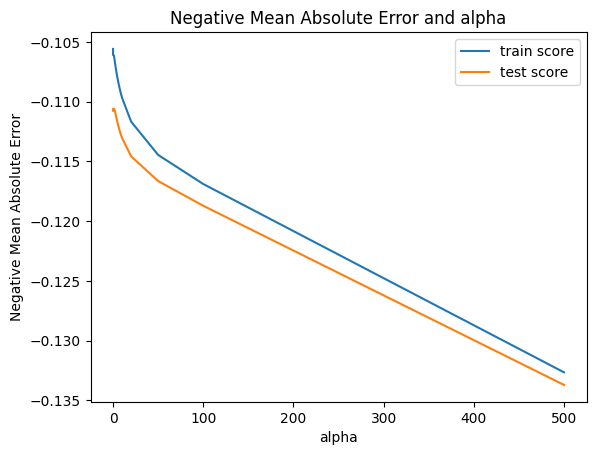

In [112]:
# plotting mean test and train scoes with alpha

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [113]:
ridge.coef_

array([ 0.10966991,  0.09420997,  0.07229536,  0.0550921 ,  0.0585104 ,
        0.07805718,  0.07914474,  0.09398341,  0.03403643, -0.05286391,
       -0.06972415, -0.05530612, -0.08918961,  0.14980666, -0.1992374 ,
       -0.1148163 ,  0.13189124,  0.10632956,  0.12679224,  0.1206136 ,
        0.09333356,  0.1831857 ,  0.10719719,  0.04567958,  0.07791361,
        0.21075084, -0.07328238, -0.08891811, -0.02606213, -0.11263514,
        0.06488083,  0.13432728,  0.07200934,  0.09073012])

In [114]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(x_test_new))

0.024154063821020384

In [115]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':x_train_new.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0            OverallQual       0.1097
1           BsmtFullBath       0.0942
2               FullBath       0.0723
3           BedroomAbvGr       0.0551
4             Fireplaces       0.0585
5             GarageCars       0.0781
6          d_KitchenQual       0.0791
7        d_SaleCondition       0.0940
8            MSZoning_FV       0.0340
9            MSZoning_RH      -0.0529
10           MSZoning_RM      -0.0697
11  Neighborhood_Blueste      -0.0553
12   Neighborhood_BrDale      -0.0892
13  Neighborhood_Crawfor       0.1498
14  Neighborhood_MeadowV      -0.1992
15  Neighborhood_NPkVill      -0.1148
16  Neighborhood_NoRidge       0.1319
17  Neighborhood_NridgHt       0.1063
18  Neighborhood_StoneBr       0.1268
19  Neighborhood_Veenker       0.1206
20     RoofStyle_Mansard       0.0933
21        RoofStyle_Shed       0.1832
22   Exterior1st_BrkFace       0.1072
23    Exterior1st_CBlock       0.0457
24   Exterior1st_CemntBd       0.0779
25     Exterior1st_Stone       0.2108
26   Exterior2nd_BrkFace      -0.0733
27     Exterior2nd_Stone      -0.0889
28    Exterior2nd_Stucco      -0.0261
29   Exterior2nd_Wd Shng      -0.1126
30      Foundation_Stone       0.0649
31       Foundation_Wood       0.1343
32     GarageType_Attchd       0.0720
33    GarageType_BuiltIn       0.0907

In [116]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = x_train_new.columns))
ridge_coeff_dict

{'OverallQual': 0.1097,
 'BsmtFullBath': 0.0942,
 'FullBath': 0.0723,
 'BedroomAbvGr': 0.0551,
 'Fireplaces': 0.0585,
 'GarageCars': 0.0781,
 'd_KitchenQual': 0.0791,
 'd_SaleCondition': 0.094,
 'MSZoning_FV': 0.034,
 'MSZoning_RH': -0.0529,
 'MSZoning_RM': -0.0697,
 'Neighborhood_Blueste': -0.0553,
 'Neighborhood_BrDale': -0.0892,
 'Neighborhood_Crawfor': 0.1498,
 'Neighborhood_MeadowV': -0.1992,
 'Neighborhood_NPkVill': -0.1148,
 'Neighborhood_NoRidge': 0.1319,
 'Neighborhood_NridgHt': 0.1063,
 'Neighborhood_StoneBr': 0.1268,
 'Neighborhood_Veenker': 0.1206,
 'RoofStyle_Mansard': 0.0933,
 'RoofStyle_Shed': 0.1832,
 'Exterior1st_BrkFace': 0.1072,
 'Exterior1st_CBlock': 0.0457,
 'Exterior1st_CemntBd': 0.0779,
 'Exterior1st_Stone': 0.2108,
 'Exterior2nd_BrkFace': -0.0733,
 'Exterior2nd_Stone': -0.0889,
 'Exterior2nd_Stucco': -0.0261,
 'Exterior2nd_Wd Shng': -0.1126,
 'Foundation_Stone': 0.0649,
 'Foundation_Wood': 0.1343,
 'GarageType_Attchd': 0.072,
 'GarageType_BuiltIn': 0.0907}

In [117]:
# Do an RFE to minimise the features to 15
x_train_ridge = x_train_new[ridge_df.Features]

lm = LinearRegression()
lm.fit(x_train_ridge, y_train)

# running RFE
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(x_train_ridge, y_train)

In [118]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( x_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

Features  rfe_support  rfe_ranking  Coefficient
11     Exterior1st_Stone         True            1       0.2108
10        RoofStyle_Shed         True            1       0.1832
4   Neighborhood_Crawfor         True            1       0.1498
14       Foundation_Wood         True            1       0.1343
6   Neighborhood_NoRidge         True            1       0.1319
8   Neighborhood_StoneBr         True            1       0.1268
9   Neighborhood_Veenker         True            1       0.1206
0            OverallQual         True            1       0.1097
7   Neighborhood_NridgHt         True            1       0.1063
1               FullBath         True            1       0.0723

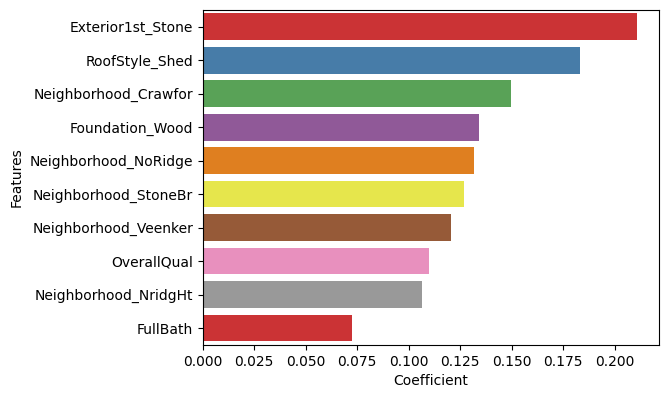

In [119]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

In [120]:
#The above graph displays the top 10 variables based on the Ridge Regression model that are significant in predicting the price
# of a house.

In [121]:
#*******Lasso Model*******

In [122]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

# Cross validation
lasso_model_cv = GridSearchCV(estimator=lasso,
                              param_grid=params,
                              scoring='neg_mean_absolute_error',
                              cv=folds,
                              return_train_score=True,
                              verbose=1)

lasso_model_cv.fit(x_train_new, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [123]:
# Printing the best hyperparameter alpha
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


In [124]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised
alpha = 0.0001

lasso = Lasso(alpha=alpha)
lasso.fit(x_train_new, y_train)
print(lasso.coef_)

[ 0.10940547  0.09400271  0.072858    0.05508203  0.05811092  0.07786133
  0.07902991  0.09509814  0.03256085 -0.04899913 -0.06936001 -0.01068722
 -0.08793035  0.14947754 -0.21353167 -0.11573953  0.13442777  0.10730522
  0.12935283  0.12305368  0.09216538  0.21980691  0.10676722  0.
  0.08124526  0.26578809 -0.07118307 -0.09874137 -0.0214593  -0.1122055
  0.05662698  0.14796177  0.07170941  0.09010269]


In [125]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(x_train_new)
y_pred_test = lasso.predict(x_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.844074458215806
0.836665832329968
19.74624537817163
9.766646961511999
0.02100664401933152
0.02423485598390074


In [126]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results =lasso_cv_results[lasso_cv_results['param_alpha']<=500]
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
0       0.0001         -0.105958        -0.110933                1
1        0.001         -0.111474        -0.114628                2
2         0.01         -0.122643        -0.124828                3
3         0.05         -0.154991        -0.156223                4
4          0.1         -0.169473        -0.170291                5
5          0.2         -0.198749        -0.199319                6
6          0.3         -0.240564        -0.240998                7
7          0.4         -0.288354        -0.288826                8
24          50         -0.289267        -0.289722                9
23          20         -0.289267        -0.289722                9
22        10.0         -0.289267        -0.289722                9
21         9.0         -0.289267        -0.289722                9
20         8.0         -0.289267        -0.289722                9
19         7.0         -0.289267        -0.289722                9
18         6.0         -0.289267        -0.289722                9
17         5.0         -0.289267        -0.289722                9
13         1.0         -0.289267        -0.289722                9
15         3.0         -0.289267        -0.289722                9
14         2.0         -0.289267        -0.289722                9
25         100         -0.289267        -0.289722                9
12         0.9         -0.289267        -0.289722                9
11         0.8         -0.289267        -0.289722                9
10         0.7         -0.289267        -0.289722                9
9          0.6         -0.289267        -0.289722                9
8          0.5         -0.289267        -0.289722                9
16         4.0         -0.289267        -0.289722                9
26         500         -0.289267        -0.289722                9

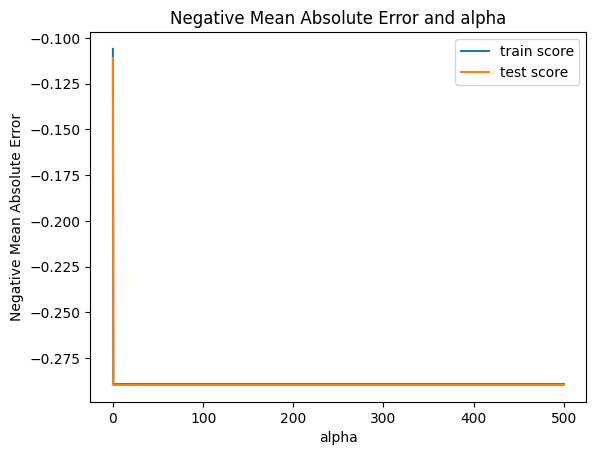

In [127]:
# plotting mean test and train scoes with alpha

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [128]:
lasso.coef_

array([ 0.10940547,  0.09400271,  0.072858  ,  0.05508203,  0.05811092,
        0.07786133,  0.07902991,  0.09509814,  0.03256085, -0.04899913,
       -0.06936001, -0.01068722, -0.08793035,  0.14947754, -0.21353167,
       -0.11573953,  0.13442777,  0.10730522,  0.12935283,  0.12305368,
        0.09216538,  0.21980691,  0.10676722,  0.        ,  0.08124526,
        0.26578809, -0.07118307, -0.09874137, -0.0214593 , -0.1122055 ,
        0.05662698,  0.14796177,  0.07170941,  0.09010269])

In [129]:
# Check the mean squared error
mean_squared_error(y_test, lasso.predict(x_test_new))

0.02423485598390074

In [130]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':x_train_new.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0            OverallQual       0.1094
1           BsmtFullBath       0.0940
2               FullBath       0.0729
3           BedroomAbvGr       0.0551
4             Fireplaces       0.0581
5             GarageCars       0.0779
6          d_KitchenQual       0.0790
7        d_SaleCondition       0.0951
8            MSZoning_FV       0.0326
9            MSZoning_RH      -0.0490
10           MSZoning_RM      -0.0694
11  Neighborhood_Blueste      -0.0107
12   Neighborhood_BrDale      -0.0879
13  Neighborhood_Crawfor       0.1495
14  Neighborhood_MeadowV      -0.2135
15  Neighborhood_NPkVill      -0.1157
16  Neighborhood_NoRidge       0.1344
17  Neighborhood_NridgHt       0.1073
18  Neighborhood_StoneBr       0.1294
19  Neighborhood_Veenker       0.1231
20     RoofStyle_Mansard       0.0922
21        RoofStyle_Shed       0.2198
22   Exterior1st_BrkFace       0.1068
23   Exterior1st_CemntBd       0.0812
24     Exterior1st_Stone       0.2658
25   Exterior2nd_BrkFace      -0.0712
26     Exterior2nd_Stone      -0.0987
27    Exterior2nd_Stucco      -0.0215
28   Exterior2nd_Wd Shng      -0.1122
29      Foundation_Stone       0.0566
30       Foundation_Wood       0.1480
31     GarageType_Attchd       0.0717
32    GarageType_BuiltIn       0.0901

In [131]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = x_train_new.columns))
lasso_coeff_dict

{'OverallQual': 0.1094054681071057,
 'BsmtFullBath': 0.09400270706062293,
 'FullBath': 0.07285799854812881,
 'BedroomAbvGr': 0.05508202930908634,
 'Fireplaces': 0.05811091684989337,
 'GarageCars': 0.07786133137083452,
 'd_KitchenQual': 0.07902990622216075,
 'd_SaleCondition': 0.09509814350990425,
 'MSZoning_FV': 0.032560846152654324,
 'MSZoning_RH': -0.04899913302015233,
 'MSZoning_RM': -0.06936000740522147,
 'Neighborhood_Blueste': -0.01068722319029318,
 'Neighborhood_BrDale': -0.08793035297189111,
 'Neighborhood_Crawfor': 0.14947753913911127,
 'Neighborhood_MeadowV': -0.2135316669443162,
 'Neighborhood_NPkVill': -0.11573952939820406,
 'Neighborhood_NoRidge': 0.13442777037415096,
 'Neighborhood_NridgHt': 0.10730522398084733,
 'Neighborhood_StoneBr': 0.12935282759715616,
 'Neighborhood_Veenker': 0.12305367943512141,
 'RoofStyle_Mansard': 0.09216538434970314,
 'RoofStyle_Shed': 0.2198069087524387,
 'Exterior1st_BrkFace': 0.10676722487460125,
 'Exterior1st_CBlock': 0.0,
 'Exterior1st_Cem

In [132]:
# Do an RFE to minimise the features to 15

X_train_lasso = x_train_new[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train_lasso, y_train)

In [133]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

Features  rfe_support  rfe_ranking  Coefficient
11     Exterior1st_Stone         True            1     0.265788
10        RoofStyle_Shed         True            1     0.219807
4   Neighborhood_Crawfor         True            1     0.149478
14       Foundation_Wood         True            1     0.147962
6   Neighborhood_NoRidge         True            1     0.134428
8   Neighborhood_StoneBr         True            1     0.129353
9   Neighborhood_Veenker         True            1     0.123054
0            OverallQual         True            1     0.109405
7   Neighborhood_NridgHt         True            1     0.107305
1               FullBath         True            1     0.072858

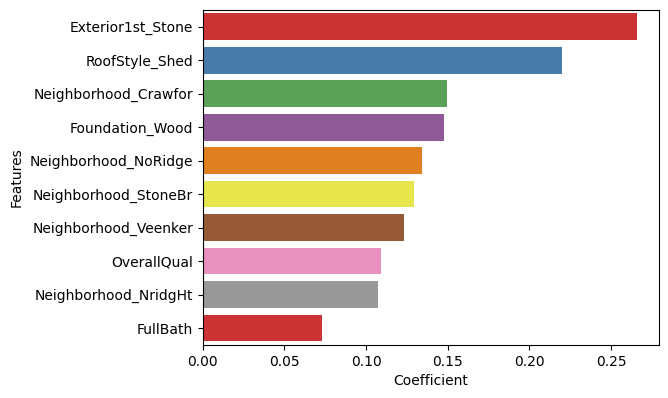

In [134]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

In [135]:
#The above graph displays the top 10 variables based on the Lasso Regression model that are significant in predicting the price
# of a house.

In [136]:
# Creating a table which contain all the metrics

lr_table = {'Metric2': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'],
        'Ridge Regression': metric2
        }

rg_metric = pd.DataFrame(lr_table ,columns = ['Metric2', 'Ridge Regression'] )

#rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([rg_metric, ls_metric], axis = 1)

final_metric

Metric2  Ridge Regression  Lasso Regression
0  R2 Score (Train)          0.843915          0.844074
1   R2 Score (Test)          0.837210          0.836666
2       RSS (Train)         19.766483         19.746245
3        RSS (Test)          9.734088          9.766647
4       MSE (Train)          0.145011          0.144937
5        MSE (Test)          0.155416          0.155675

In [137]:
## Conclusion :
'''
- The optimal lambda value in case of Ridge and Lasso is as below:
    - Ridge - 0.9
    - Lasso - 0.0001

- The Mean Squared error in case of Ridge and Lasso are:
    - Ridge - 0.0241
    - Lasso - 0.0242

- Also, since Lasso helps in feature reduction (as the coefficient value of one of the features became 0), Lasso has a better edge over Ridge.

- Therefore, the variables predicted by Lasso can be applied to choose significant variables for predicting the price of a house.

- Hence based on Lasso, the factors that generally affect the price are the Exterior1st_Stone, RoofStyle_Shed, Foundation_Wood, Neighborhood_Crawfor,Neighborhood_NoRidge, Neighborhood_StoneBr, Neighborhood_Veenker,OverallQual, Neighborhood_NridgHt and FullBath

Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the
price of a house.'''

'\n- The optimal lambda value in case of Ridge and Lasso is as below:\n    - Ridge - 0.9\n    - Lasso - 0.0001\n\n- The Mean Squared error in case of Ridge and Lasso are:\n    - Ridge - 0.0241\n    - Lasso - 0.0242\n\n- Also, since Lasso helps in feature reduction (as the coefficient value of one of the features became 0), Lasso has a better edge over Ridge.\n\n- Therefore, the variables predicted by Lasso can be applied to choose significant variables for predicting the price of a house.\n\n- Hence based on Lasso, the factors that generally affect the price are the Exterior1st_Stone, RoofStyle_Shed, Foundation_Wood, Neighborhood_Crawfor,Neighborhood_NoRidge, Neighborhood_StoneBr, Neighborhood_Veenker,OverallQual, Neighborhood_NridgHt and FullBath\n\nTherefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the\nprice of a house.'

In [138]:
# Question1
# What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of apha for both ridge and lasso? What will be the important predator variable after the change is implemented?

In [139]:
## Earlier the value of alpha for lasso was 0.001. Now we take double i.e. 0.002
#Fitting lasso model for alpha = 0.0002 and printing coefficients which have been penalised
alpha = 0.0002

lasso = Lasso(alpha=alpha)
lasso.fit(x_train_new, y_train)
print(lasso.coef_)

[ 0.1109456   0.09407635  0.072272    0.05462073  0.05828124  0.07840023
  0.07897844  0.09337145  0.02845832 -0.03907069 -0.07067088 -0.
 -0.07587745  0.14437434 -0.19227413 -0.10515089  0.12573653  0.10101845
  0.11803367  0.10433138  0.07654979  0.17201616  0.08482858  0.
  0.07487629  0.1886715  -0.04233727 -0.04269036 -0.0131426  -0.10563662
  0.03967974  0.09990885  0.07097412  0.08743309]


In [140]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(x_train_new)
y_pred_test = lasso.predict(x_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.843068119117925
0.8361896372965436
19.873687095115645
9.795121277955557
0.021142220313952815
0.024305511855969124


In [141]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results =lasso_cv_results[lasso_cv_results['param_alpha']<=500]
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
0       0.0001         -0.105958        -0.110933                1
1        0.001         -0.111474        -0.114628                2
2         0.01         -0.122643        -0.124828                3
3         0.05         -0.154991        -0.156223                4
4          0.1         -0.169473        -0.170291                5
5          0.2         -0.198749        -0.199319                6
6          0.3         -0.240564        -0.240998                7
7          0.4         -0.288354        -0.288826                8
24          50         -0.289267        -0.289722                9
23          20         -0.289267        -0.289722                9
22        10.0         -0.289267        -0.289722                9
21         9.0         -0.289267        -0.289722                9
20         8.0         -0.289267        -0.289722                9
19         7.0         -0.289267        -0.289722                9
18         6.0         -0.289267        -0.289722                9
17         5.0         -0.289267        -0.289722                9
13         1.0         -0.289267        -0.289722                9
15         3.0         -0.289267        -0.289722                9
14         2.0         -0.289267        -0.289722                9
25         100         -0.289267        -0.289722                9
12         0.9         -0.289267        -0.289722                9
11         0.8         -0.289267        -0.289722                9
10         0.7         -0.289267        -0.289722                9
9          0.6         -0.289267        -0.289722                9
8          0.5         -0.289267        -0.289722                9
16         4.0         -0.289267        -0.289722                9
26         500         -0.289267        -0.289722                9

In [142]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(x_test_new))

0.024305511855969124

In [143]:
lasso.coef_

array([ 0.1109456 ,  0.09407635,  0.072272  ,  0.05462073,  0.05828124,
        0.07840023,  0.07897844,  0.09337145,  0.02845832, -0.03907069,
       -0.07067088, -0.        , -0.07587745,  0.14437434, -0.19227413,
       -0.10515089,  0.12573653,  0.10101845,  0.11803367,  0.10433138,
        0.07654979,  0.17201616,  0.08482858,  0.        ,  0.07487629,
        0.1886715 , -0.04233727, -0.04269036, -0.0131426 , -0.10563662,
        0.03967974,  0.09990885,  0.07097412,  0.08743309])

In [144]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':x_train_new.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0            OverallQual       0.1109
1           BsmtFullBath       0.0941
2               FullBath       0.0723
3           BedroomAbvGr       0.0546
4             Fireplaces       0.0583
5             GarageCars       0.0784
6          d_KitchenQual       0.0790
7        d_SaleCondition       0.0934
8            MSZoning_FV       0.0285
9            MSZoning_RH      -0.0391
10           MSZoning_RM      -0.0707
11   Neighborhood_BrDale      -0.0759
12  Neighborhood_Crawfor       0.1444
13  Neighborhood_MeadowV      -0.1923
14  Neighborhood_NPkVill      -0.1052
15  Neighborhood_NoRidge       0.1257
16  Neighborhood_NridgHt       0.1010
17  Neighborhood_StoneBr       0.1180
18  Neighborhood_Veenker       0.1043
19     RoofStyle_Mansard       0.0765
20        RoofStyle_Shed       0.1720
21   Exterior1st_BrkFace       0.0848
22   Exterior1st_CemntBd       0.0749
23     Exterior1st_Stone       0.1887
24   Exterior2nd_BrkFace      -0.0423
25     Exterior2nd_Stone      -0.0427
26    Exterior2nd_Stucco      -0.0131
27   Exterior2nd_Wd Shng      -0.1056
28      Foundation_Stone       0.0397
29       Foundation_Wood       0.0999
30     GarageType_Attchd       0.0710
31    GarageType_BuiltIn       0.0874

In [145]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = x_train_new.columns))
lasso_coeff_dict

{'OverallQual': 0.11094559630270177,
 'BsmtFullBath': 0.09407635333527288,
 'FullBath': 0.07227200154398704,
 'BedroomAbvGr': 0.05462073208577521,
 'Fireplaces': 0.058281241108015365,
 'GarageCars': 0.07840022695323184,
 'd_KitchenQual': 0.07897844072657519,
 'd_SaleCondition': 0.09337145090522125,
 'MSZoning_FV': 0.028458316542005282,
 'MSZoning_RH': -0.03907069384514252,
 'MSZoning_RM': -0.07067087589928142,
 'Neighborhood_Blueste': -0.0,
 'Neighborhood_BrDale': -0.07587745248062407,
 'Neighborhood_Crawfor': 0.14437433922723505,
 'Neighborhood_MeadowV': -0.19227412944922595,
 'Neighborhood_NPkVill': -0.10515089428797497,
 'Neighborhood_NoRidge': 0.12573653010995187,
 'Neighborhood_NridgHt': 0.10101844742550059,
 'Neighborhood_StoneBr': 0.11803366839278095,
 'Neighborhood_Veenker': 0.1043313792582306,
 'RoofStyle_Mansard': 0.0765497904564901,
 'RoofStyle_Shed': 0.17201615574837964,
 'Exterior1st_BrkFace': 0.08482857764954428,
 'Exterior1st_CBlock': 0.0,
 'Exterior1st_CemntBd': 0.07487

In [146]:
# Do an RFE to minimise the features to 15

X_train_lasso = x_train_new[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train_lasso, y_train)

In [147]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

Features  rfe_support  rfe_ranking  Coefficient
11     Exterior1st_Stone         True            1     0.188671
10        RoofStyle_Shed         True            1     0.172016
4   Neighborhood_Crawfor         True            1     0.144374
6   Neighborhood_NoRidge         True            1     0.125737
8   Neighborhood_StoneBr         True            1     0.118034
0            OverallQual         True            1     0.110946
9   Neighborhood_Veenker         True            1     0.104331
7   Neighborhood_NridgHt         True            1     0.101018
14       Foundation_Wood         True            1     0.099909
1               FullBath         True            1     0.072272

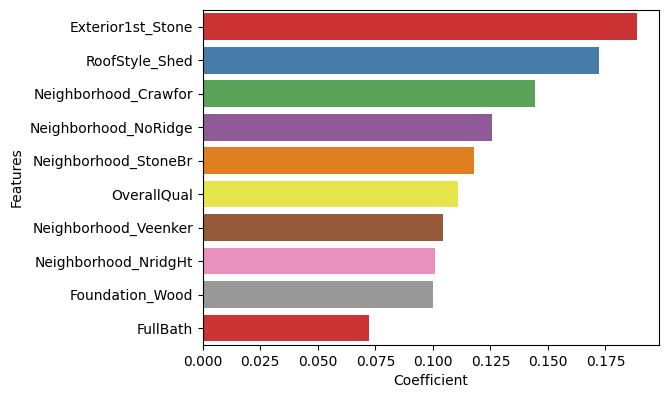

In [148]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

In [149]:
#Most important Variable are: Exterior1st_Stone, RoofStyle_Shed, Neighborhood_Crawfor, Neighborhood_NoRidge, Neighborhood_NoRidge

In [150]:
# Ridge Model

In [151]:
# Earlier the value of alpha for ridge was 0.9. Now we will take double i.e. 1.8
#Fitting Ridge model for alpha = 1.8 and printing coefficients which have been penalised
alpha = 1.8
ridge = Ridge(alpha=alpha)

ridge.fit(x_train_new, y_train)
print(ridge.coef_)

[ 0.11087969  0.09420747  0.07171239  0.05482481  0.05885083  0.07867125
  0.07927964  0.09249801  0.0318791  -0.04830465 -0.07150742 -0.03741723
 -0.08024411  0.14509584 -0.17262717 -0.10509383  0.12305284  0.10084617
  0.11617283  0.10536028  0.08216655  0.13943298  0.09462572  0.03128716
  0.07104086  0.15220008 -0.05705935 -0.05953951 -0.02329832 -0.10731444
  0.05796949  0.10214288  0.07091802  0.08796234]


In [152]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(x_train_new)
y_pred_test = ridge.predict(x_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8430411839915006
0.8371259577359405
19.877098130983043
9.739133536352647
0.021145849075513874
0.024166584457450735


In [153]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
13         1.0         -0.106141        -0.110589                1
12         0.9         -0.106089        -0.110594                2
11         0.8         -0.106036        -0.110607                3
10         0.7         -0.105984        -0.110622                4
9          0.6         -0.105929        -0.110641                5
8          0.5         -0.105871        -0.110660                6
7          0.4         -0.105809        -0.110680                7
6          0.3         -0.105742        -0.110698                8
5          0.2         -0.105689        -0.110715                9
4          0.1         -0.105637        -0.110734               10
3         0.05         -0.105610        -0.110743               11
2         0.01         -0.105587        -0.110750               12
1        0.001         -0.105582        -0.110751               13
0       0.0001         -0.105582        -0.110751               14
14         2.0         -0.106680        -0.110761               15
15         3.0         -0.107186        -0.111099               16
16         4.0         -0.107652        -0.111446               17
17         5.0         -0.108070        -0.111779               18
18         6.0         -0.108446        -0.112071               19
19         7.0         -0.108792        -0.112342               20
20         8.0         -0.109112        -0.112596               21
21         9.0         -0.109407        -0.112828               22
22        10.0         -0.109681        -0.113038               23
23          20         -0.111664        -0.114568               24
24          50         -0.114454        -0.116643               25
25         100         -0.116886        -0.118708               26
26         500         -0.132644        -0.133699               27

In [154]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(x_test_new))

0.024166584457450735

In [155]:
ridge.coef_

array([ 0.11087969,  0.09420747,  0.07171239,  0.05482481,  0.05885083,
        0.07867125,  0.07927964,  0.09249801,  0.0318791 , -0.04830465,
       -0.07150742, -0.03741723, -0.08024411,  0.14509584, -0.17262717,
       -0.10509383,  0.12305284,  0.10084617,  0.11617283,  0.10536028,
        0.08216655,  0.13943298,  0.09462572,  0.03128716,  0.07104086,
        0.15220008, -0.05705935, -0.05953951, -0.02329832, -0.10731444,
        0.05796949,  0.10214288,  0.07091802,  0.08796234])

In [156]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':x_train_new.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0            OverallQual       0.1109
1           BsmtFullBath       0.0942
2               FullBath       0.0717
3           BedroomAbvGr       0.0548
4             Fireplaces       0.0589
5             GarageCars       0.0787
6          d_KitchenQual       0.0793
7        d_SaleCondition       0.0925
8            MSZoning_FV       0.0319
9            MSZoning_RH      -0.0483
10           MSZoning_RM      -0.0715
11  Neighborhood_Blueste      -0.0374
12   Neighborhood_BrDale      -0.0802
13  Neighborhood_Crawfor       0.1451
14  Neighborhood_MeadowV      -0.1726
15  Neighborhood_NPkVill      -0.1051
16  Neighborhood_NoRidge       0.1231
17  Neighborhood_NridgHt       0.1008
18  Neighborhood_StoneBr       0.1162
19  Neighborhood_Veenker       0.1054
20     RoofStyle_Mansard       0.0822
21        RoofStyle_Shed       0.1394
22   Exterior1st_BrkFace       0.0946
23    Exterior1st_CBlock       0.0313
24   Exterior1st_CemntBd       0.0710
25     Exterior1st_Stone       0.1522
26   Exterior2nd_BrkFace      -0.0571
27     Exterior2nd_Stone      -0.0595
28    Exterior2nd_Stucco      -0.0233
29   Exterior2nd_Wd Shng      -0.1073
30      Foundation_Stone       0.0580
31       Foundation_Wood       0.1021
32     GarageType_Attchd       0.0709
33    GarageType_BuiltIn       0.0880

In [157]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = x_train_new.columns))
ridge_coeff_dict

{'OverallQual': 0.1109,
 'BsmtFullBath': 0.0942,
 'FullBath': 0.0717,
 'BedroomAbvGr': 0.0548,
 'Fireplaces': 0.0589,
 'GarageCars': 0.0787,
 'd_KitchenQual': 0.0793,
 'd_SaleCondition': 0.0925,
 'MSZoning_FV': 0.0319,
 'MSZoning_RH': -0.0483,
 'MSZoning_RM': -0.0715,
 'Neighborhood_Blueste': -0.0374,
 'Neighborhood_BrDale': -0.0802,
 'Neighborhood_Crawfor': 0.1451,
 'Neighborhood_MeadowV': -0.1726,
 'Neighborhood_NPkVill': -0.1051,
 'Neighborhood_NoRidge': 0.1231,
 'Neighborhood_NridgHt': 0.1008,
 'Neighborhood_StoneBr': 0.1162,
 'Neighborhood_Veenker': 0.1054,
 'RoofStyle_Mansard': 0.0822,
 'RoofStyle_Shed': 0.1394,
 'Exterior1st_BrkFace': 0.0946,
 'Exterior1st_CBlock': 0.0313,
 'Exterior1st_CemntBd': 0.071,
 'Exterior1st_Stone': 0.1522,
 'Exterior2nd_BrkFace': -0.0571,
 'Exterior2nd_Stone': -0.0595,
 'Exterior2nd_Stucco': -0.0233,
 'Exterior2nd_Wd Shng': -0.1073,
 'Foundation_Stone': 0.058,
 'Foundation_Wood': 0.1021,
 'GarageType_Attchd': 0.0709,
 'GarageType_BuiltIn': 0.088}

In [158]:
# Do an RFE to minimise the features to 15
x_train_ridge = x_train_new[ridge_df.Features]

lm = LinearRegression()
lm.fit(x_train_ridge, y_train)

# running RFE
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(x_train_ridge, y_train)

In [159]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( x_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

Features  rfe_support  rfe_ranking  Coefficient
11     Exterior1st_Stone         True            1       0.1522
4   Neighborhood_Crawfor         True            1       0.1451
10        RoofStyle_Shed         True            1       0.1394
6   Neighborhood_NoRidge         True            1       0.1231
8   Neighborhood_StoneBr         True            1       0.1162
0            OverallQual         True            1       0.1109
9   Neighborhood_Veenker         True            1       0.1054
14       Foundation_Wood         True            1       0.1021
7   Neighborhood_NridgHt         True            1       0.1008
1               FullBath         True            1       0.0717

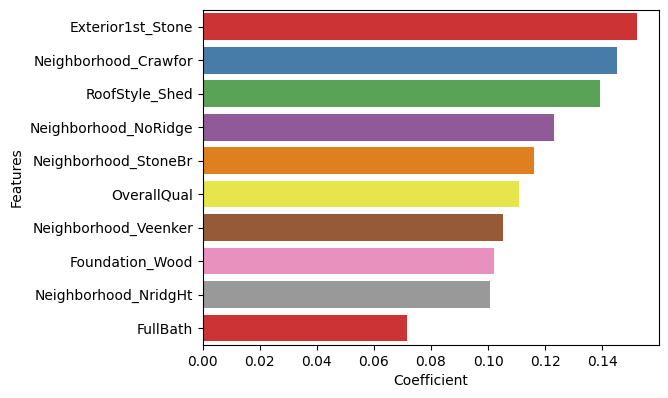

In [160]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

In [161]:
#Most important Variable are: Exterior1st_Stone, RoofStyle_Shed, Neighborhood_Crawfor, Neighborhood_NoRidge, Neighborhood_NoRidge

In [162]:
# Question 3

# After making the model, you realize that the 5 most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the 5 most important predictor variables. Which are the 5 most important predictor variable now?


In [163]:
x_train_new.drop(['Exterior1st_Stone', 'RoofStyle_Shed', 'Foundation_Wood', 'Neighborhood_Crawfor','Neighborhood_NoRidge'], axis = 1, inplace = True)

In [164]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

lasso_model_cv.fit(x_train_new, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [165]:
# Printing the best hyperparameter alpha
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


In [166]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised
alpha = 0.0001

lasso = Lasso(alpha=alpha)
lasso.fit(x_train_new, y_train)
print(lasso.coef_)

[ 0.11562726  0.09483396  0.06841519  0.05440963  0.06618009  0.07923154
  0.07885434  0.0876451   0.0161589  -0.02422068 -0.07670111 -0.01781669
 -0.09319539 -0.21681098 -0.12513095  0.08435387  0.10210016  0.10042977
  0.078931    0.11192267  0.          0.09252135 -0.06757383  0.
  0.         -0.10910394  0.07313489  0.06607829  0.08356495]


In [167]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':x_train_new.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0            OverallQual       0.1156
1           BsmtFullBath       0.0948
2               FullBath       0.0684
3           BedroomAbvGr       0.0544
4             Fireplaces       0.0662
5             GarageCars       0.0792
6          d_KitchenQual       0.0789
7        d_SaleCondition       0.0876
8            MSZoning_FV       0.0162
9            MSZoning_RH      -0.0242
10           MSZoning_RM      -0.0767
11  Neighborhood_Blueste      -0.0178
12   Neighborhood_BrDale      -0.0932
13  Neighborhood_MeadowV      -0.2168
14  Neighborhood_NPkVill      -0.1251
15  Neighborhood_NridgHt       0.0844
16  Neighborhood_StoneBr       0.1021
17  Neighborhood_Veenker       0.1004
18     RoofStyle_Mansard       0.0789
19   Exterior1st_BrkFace       0.1119
20   Exterior1st_CemntBd       0.0925
21   Exterior2nd_BrkFace      -0.0676
22   Exterior2nd_Wd Shng      -0.1091
23      Foundation_Stone       0.0731
24     GarageType_Attchd       0.0661
25    GarageType_BuiltIn       0.0836

In [168]:
# Do an RFE to minimise the features to 15

X_train_lasso = x_train_new[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train_lasso, y_train)

In [169]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

Features  rfe_support  rfe_ranking  Coefficient
0            OverallQual         True            1     0.110946
10  Neighborhood_Veenker         True            1     0.104331
1           BsmtFullBath         True            1     0.094076
4        d_SaleCondition         True            1     0.093371
3             GarageCars         True            1     0.078400
11     RoofStyle_Mansard         True            1     0.076550
12   Exterior1st_CemntBd         True            1     0.074876
2               FullBath         True            1     0.072272
14      Foundation_Stone         True            1     0.039680
6   Neighborhood_Blueste         True            1    -0.000000

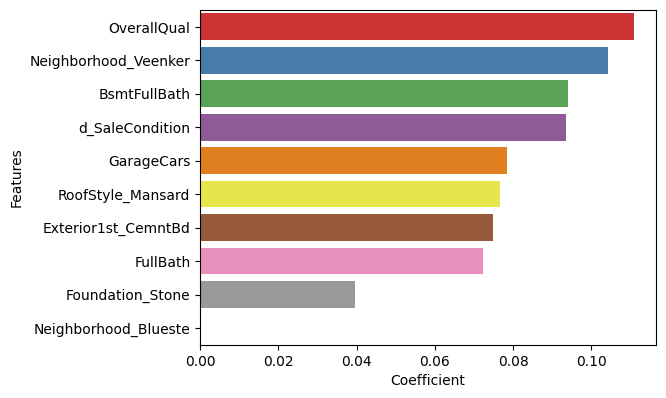

In [170]:
##bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

In [171]:
#5 most important variable post building new model are Neighborhood_Veenker, OverallQual, d_SaleCondition, BsmtFullBath, RoofStyle_Mansard